In [1]:
from aixi_booster import *
import numpy as np
import pandas as pd
import random

In [2]:
#X = np.array(np.arange(1000),ndmin=2).T
#Y = np.array(np.sin(X/12.),ndmin=2)

In [3]:
np.random.seed(0)
random.seed(0)

In [4]:
#делаем датасет
#Суть датасета: есть зашумлённая синусоида, на которую наложены случайные блуждания. 
#AIXI примерно знает текущее состояние блужданий и немного устаревшие значения этой "синусоиды"
j = 0
X_lst = []
Y_lst = []
X_rec = [0, 0]
k = 0
dk = -0.02
for i in range(5500):
    j += (np.random.rand()-0.5)*6
    dk += (np.random.rand()-0.48)*0.001
    k += dk
    Y_rec = [np.sin(X_rec[0]*0.02 + X_rec[1]*0.0000001) * (1 + np.cos(X_rec[0] * 0.001) * X_rec[1] * 0.1) + k]
    Y_prev = 0
    if len(Y_lst)>5:
        Y_prev = Y_lst[-5][0]
    X_rec = [i, j, dk, Y_prev]
    X_lst.append(X_rec)
    Y_lst.append(Y_rec)
X = np.array(X_lst)
Y = np.array(Y_lst)

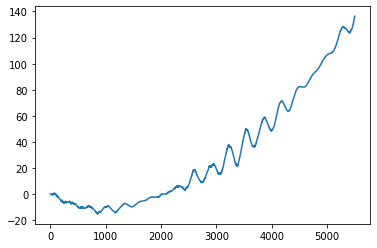

In [5]:
plt.plot(Y)

In [6]:
%%time
#forest_count - число гипотез, то есть размер леса гипотез
#episodes - эпизоды работы AIXI. Если в реальной жизни данные - это несколько блоков по несколько записей.
#Причём каждый блок - это последовательность, у которой известно прошлое, но неизвестно будущее и неизвестны другие последовательности.
#Вот эпизоды - это такие последовательности. Например, если у нас данные - это 2 поездки на машине в 10 минут и в 50 минут, то первым эпизодом будут данные из одной поездки, а вторым - из второй.
#sample_part - сколько последовательностей использовать для генерации каждой одной гипотезы
#popsize, maxiter, alpha_count, elitarism, mutation_p - параметры эволюции (мы не будет тупо перебирать гипотезы)
#popsize - размер популяции, maxiter - число поколений, alpha_count - число альфачей (кто размножается), elitarism - число элитариев (кто сохраняется в неизменном виде в следующем поколении) 
#mutation_p - вероятность мутации
#boosting_count - каждая гипотеза сделана по схеме "бустинг". То есть вначале подбираем гипотезу, 
#которая максимально хорошо предсказывает Y, затем гипотезу, которая максимально хорошо исправляет ошибки первой гипотезы и так далее
#boosting_count - это число слоёв в этом "бутерброде"
model = symbolic_regression_multyboosting(size_genom=900, tact_count=30, regularization=1.,postprocessing_prod='lin', postprocessing_learn='lin')
fractor = 22
episodes = []
for i in range(fractor):
    episodes.append([i*int(len(Y)/fractor), (i+1)*int(len(Y)/fractor)])
episodes_train = episodes[:-5]
episodes_test = episodes[-5:]
border = episodes_train[-1][-1]
X_train = X[:border]
Y_train = Y[:border]
X_test = X[border:]
Y_test = Y[border:]
model.fit(X_train,Y_train,forest_count=20,sample_part=0.8,episodes=episodes_train,popsize=30, maxiter=3, boosting_count=2, alpha_count=5, elitarism=2, mutation_p=0.02, n_jobs=7)

FOREST NUMBER 0, episodes [[2000 2250]
 [3750 4000]
 [3250 3500]
 [2000 2250]
 [2750 3000]
 [2750 3000]
 [2000 2250]
 [1750 2000]
 [ 500  750]
 [2750 3000]
 [3750 4000]
 [1250 1500]
 [1750 2000]
 [ 750 1000]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0037907505686884005 0.0326189509964718 0.021099447578218716 0.06130115089538842
iteration 0 y= [0.001778   0.0018578  0.00185963 0.00187578 0.00193845 0.00203601
 0.00203777 0.00210746 0.00214658 0.00219616 0.00219751 0.00223648]
iteration 1 y= [0.00174246 0.001778   0.0018578  0.00185792 0.00185963 0.00186372
 0.00187433 0.00187578 0.00190001 0.00193845 0.00193928 0.00202721]
iteration 2 y= [0.00162516 0.00163577 0.00174246 0.00175956 0.001778   0.00177877
 0.0018419  0.0018578  0.00185792 0.00185963 0.00186372 0.00187433]
iteration final y= [0.00162516 0.00163577 0.00163727 0.00174246 0.00175956 0.00177191
 0.00177599 0.00177684 0.001778   0.00177877 0.00178976 0.00181073]
NOCOMPILED [  0.           0.           0.           0. 

BOOST 0 ready. Score 0.002003704772875956.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0037907505686884005 0.0323699421966474 0.021091811414516128 0.06098579782798663
iteration 0 y= [0.46882117 0.47243642 0.49658872 0.52376997 0.55310108 0.56932238
 0.58019404 0.60348412 0.61192436 0.61850717 0.63315671 0.65708834]
iteration 1 y= [0.37133335 0.40635437 0.42305903 0.42319727 0.435211   0.44658523
 0.44858216 0.4525548  0.45667108 0.45944756 0.46882117 0.47243642]
iteration 2 y= [0.37133335 0.39537369 0.40399242 0.40635437 0.40719767 0.4172514
 0.42305903 0.42319727 0.42731104 0.435211   0.43642204 0.43642204]
iteration final y= [0.37133335 0.38273649 0.39537369 0.39903261 0.40399242 0.40635437
 0.40719767 0.40906673 0.41210106 0.41323465 0.4172514  0.42305903]
NOCOMPILED [   0.            0.         1002.            0.            0.
    0.            0.            0.            0.            0.
  752.            0.            0.            0.            0.
    0.          907.

selected boosting without linear layer, mse 2.1758376640636503 [1334.7450911690132, 2.1758376640636503, 780.2383344056358, 8.261710206811633, 18486.44357190275, 31774.6323611219]
BOOST 1 ready. Score:0.5686821817429784
err_sum,complexity 3.852378598216701 208
FOREST NUMBER 1, episodes [[   0  250]
 [2250 2500]
 [   0  250]
 [ 250  500]
 [1000 1250]
 [2250 2500]
 [ 750 1000]
 [4000 4250]
 [3750 4000]
 [ 750 1000]
 [2000 2250]
 [3250 3500]
 [ 500  750]
 [ 500  750]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0037907505686884005 0.03192474889742365 0.021035023435632603 0.06018518518541666
iteration 0 y= [0.0018109  0.00185495 0.00187066 0.00188694 0.00190026 0.00190228
 0.00197557 0.00201    0.00202941 0.00206585 0.00206688 0.00206941]
iteration 1 y= [0.00153016 0.00163214 0.00179856 0.0018109  0.00183683 0.00184473
 0.00184473 0.00184473 0.00184473 0.00184473 0.00184473 0.00184473]
iteration 2 y= [0.00153016 0.00163214 0.0016433  0.0016743  0.00170372 0.00171816
 0.00172157 0.001

BOOST 0 ready. Score 0.001818910939726031.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0037907505686884005 0.03187177597643699 0.02102859571889349 0.05972087613906571
iteration 0 y= [0.55624939 0.60975632 0.61090385 0.63565435 0.70414862 0.70445278
 0.71076172 0.7111123  0.71145003 0.71781615 0.72507098 0.73210369]
iteration 1 y= [0.55356028 0.55624939 0.59526926 0.60975632 0.61090385 0.63565435
 0.66666468 0.70414862 0.70445278 0.71076172 0.7111123  0.71145003]
iteration 2 y= [0.50953748 0.52054551 0.53986934 0.55356028 0.55624939 0.57424705
 0.57424705 0.57424705 0.57424705 0.57424705 0.57424705 0.57424705]
iteration final y= [0.48747507 0.50589365 0.50953748 0.51898726 0.52054551 0.53986934
 0.54166504 0.55356028 0.55624939 0.56597426 0.57254082 0.5733841 ]
NOCOMPILED [   0.            0.            0.          619.9510307     0.
    0.            0.            0.            0.            0.
    0.            0.            0.          100.90959677    0.
    0.            0

selected boosting without linear layer, mse 7.998763876897532 [2940.9993496505235, 7.998763876897532, 1768.2387560785987, 223.49745890482978, 14093.58869941127, 14833.623061329168]
BOOST 1 ready. Score:0.5615051345776262
err_sum,complexity 18.140676397788976 211
FOREST NUMBER 2, episodes [[3750 4000]
 [3000 3250]
 [1500 1750]
 [2000 2250]
 [2750 3000]
 [1500 1750]
 [1500 1750]
 [ 500  750]
 [ 250  500]
 [1750 2000]
 [3500 3750]
 [1250 1500]
 [3500 3750]
 [1000 1250]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0037907505686884005 0.031784017315375765 0.021021484464889204 0.059412336582745695
iteration 0 y= [0.00155414 0.00165845 0.00171075 0.00171328 0.00185649 0.00186981
 0.00187539 0.00193053 0.00194068 0.00194536 0.00199847 0.00200196]
iteration 1 y= [0.001521   0.00155414 0.00165845 0.00171075 0.00171328 0.0017651
 0.00185649 0.00186013 0.00186981 0.00187539 0.00187764 0.00188419]
iteration 2 y= [0.001521   0.00155414 0.00164592 0.00165845 0.00171075 0.00171328
 0.00173935 0

BOOST 0 ready. Score 0.001549288728720868.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0037907505686884005 0.031626506024246985 0.020979020979137526 0.05936920222653062
iteration 0 y= [0.77131256 0.77372036 0.7754896  0.77872774 0.78763667 0.80181123
 0.81790709 0.83508862 0.85134818 0.85355713 0.85375705 0.86385284]
iteration 1 y= [0.51043745 0.55791375 0.63129108 0.63274054 0.65029622 0.67315305
 0.67669597 0.67979281 0.70750264 0.74050328 0.74251698 0.75038616]
iteration 2 y= [0.51043745 0.5154644  0.5228848  0.5321233  0.5321233  0.5321233
 0.5321233  0.5321233  0.5321233  0.5321233  0.5321233  0.5321233 ]
iteration final y= [0.51043745 0.5154644  0.5228848  0.53040575 0.5321233  0.5321233
 0.5321233  0.5321233  0.5321233  0.5321233  0.5321233  0.5321233 ]
NOCOMPILED [   0.            0.            0.            0.            0.
    0.          823.            0.            0.            0.
    0.            0.          933.            0.            0.
    0.            0

selected boosting without linear layer, mse 4.633100105821382 [253120.32475460725, 4.633100105821382, 6408.324494607747, 46.223999858290554, 17954.447196271125, 231540.11467818316]
BOOST 1 ready. Score:0.6728821702199537
err_sum,complexity 4438.208402055959 159
FOREST NUMBER 3, episodes [[ 750 1000]
 [4000 4250]
 [2500 2750]
 [4000 4250]
 [   0  250]
 [2000 2250]
 [2500 2750]
 [ 750 1000]
 [1250 1500]
 [2250 2500]
 [1000 1250]
 [1750 2000]
 [1250 1500]
 [ 750 1000]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0037348272643323997 0.03147589587796146 0.020979020979137526 0.0587608845457078
iteration 0 y= [0.00152512 0.00157606 0.00169212 0.00174901 0.00177546 0.00180005
 0.00190007 0.00192132 0.00192273 0.00199202 0.00200239 0.00200485]
iteration 1 y= [0.00152512 0.00157606 0.00169212 0.00171616 0.00174901 0.0017573
 0.00177546 0.00178875 0.00179779 0.00180005 0.00182325 0.00182646]
iteration 2 y= [0.00152512 0.00157606 0.00164998 0.00165707 0.00166146 0.00166664
 0.00166664 0.001

BOOST 0 ready. Score 0.0016328158634811394.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0037348272643323997 0.03141287284159419 0.020972954427749643 0.05840601004855535
iteration 0 y= [0.40236051 0.49212428 0.57687554 0.58151858 0.59627544 0.65060131
 0.66063123 0.66416216 0.68522446 0.69531981 0.70545984 0.70784265]
iteration 1 y= [0.40236051 0.42879232 0.43721495 0.47934081 0.49212428 0.49359332
 0.55486291 0.56309331 0.57149208 0.57149208 0.57149208 0.57149208]
iteration 2 y= [0.3989431  0.40236051 0.40311295 0.42879232 0.43721495 0.47934081
 0.4857194  0.4857194  0.4857194  0.4857194  0.4857194  0.4857194 ]
iteration final y= [0.36022629 0.36191457 0.39184728 0.39199366 0.39199366 0.39199366
 0.39199366 0.39199366 0.39199366 0.39199366 0.39199366 0.39199366]
NOCOMPILED [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
  549.99471921  559.87705545    0.            0.            0.
    0.           

selected boosting without linear layer, mse 2.8642326255672494 [14.69214562737682, 2.8642326255672494, 701.7882449085179, 3.310135595950296, 6950.361296521295, 130180.53533002074]
BOOST 1 ready. Score:0.46656074937431985
err_sum,complexity 3.5608661489079925 173
FOREST NUMBER 4, episodes [[1000 1250]
 [2500 2750]
 [3250 3500]
 [3750 4000]
 [ 250  500]
 [1250 1500]
 [4000 4250]
 [2000 2250]
 [3250 3500]
 [3250 3500]
 [3250 3500]
 [1250 1500]
 [1250 1500]
 [ 250  500]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0037348272643323997 0.031343283582238805 0.0209731543625 0.058122205663338304
iteration 0 y= [0.00151057 0.0016592  0.00171012 0.00171637 0.00171765 0.00173457
 0.00175432 0.00179356 0.00183188 0.00184301 0.00186382 0.00186666]
iteration 1 y= [0.00151057 0.00164807 0.0016592  0.00166135 0.0016681  0.00169569
 0.00171012 0.00171371 0.00171637 0.00171765 0.00173457 0.00175432]
iteration 2 y= [0.00151057 0.00164807 0.0016592  0.00166135 0.0016681  0.00169569
 0.00171012 0.001

BOOST 0 ready. Score 0.001651988306479129.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0037348272643323997 0.031270700936533745 0.020930232558255813 0.058061766153660876
iteration 0 y= [0.65233817 0.6825048  0.69615641 0.72241436 0.73653673 0.7386594
 0.76201131 0.77524649 0.77627278 0.77894279 0.80241396 0.80803115]
iteration 1 y= [0.65233817 0.6825048  0.68550874 0.69615641 0.72241436 0.72790611
 0.73427361 0.73653673 0.7386594  0.76201131 0.76756033 0.77068624]
iteration 2 y= [0.65233817 0.65570771 0.6825048  0.68550874 0.69615641 0.72241436
 0.72790611 0.73427361 0.73653673 0.73710687 0.73710687 0.73710687]
iteration final y= [0.61034714 0.65233817 0.65570771 0.65647543 0.65855436 0.66160156
 0.67363007 0.6825048  0.68550874 0.69615641 0.70910799 0.7180118 ]
NOCOMPILED [   0.            0.          930.96715551    0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.           

selected boosting without linear layer, mse 2.9838431864377464 [840.8451531626934, 2.9838431864377464, 1444.5906395729846, 1031.4763217062202, 45401.04903462315, 102600.93449896034]
BOOST 1 ready. Score:0.805470521421857
err_sum,complexity 94.81741766592982 183
FOREST NUMBER 5, episodes [[1500 1750]
 [1250 1500]
 [2250 2500]
 [3250 3500]
 [2500 2750]
 [1500 1750]
 [2000 2250]
 [ 250  500]
 [3250 3500]
 [4000 4250]
 [2750 3000]
 [1500 1750]
 [2750 3000]
 [ 750 1000]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0037348272643323997 0.031185031185239086 0.02092022083023492 0.057844040925650056
iteration 0 y= [0.00179513 0.00191213 0.00195893 0.00196913 0.00196918 0.00197702
 0.00206863 0.00208533 0.00212405 0.00215296 0.00220451 0.00220526]
iteration 1 y= [0.00179513 0.00191213 0.00192514 0.00193251 0.00194558 0.00195443
 0.00195893 0.00196913 0.00196918 0.0019726  0.00197702 0.00197979]
iteration 2 y= [0.00179513 0.00191213 0.00192514 0.00193251 0.00194558 0.00195443
 0.00195893 0.

BOOST 0 ready. Score 0.0023041626287864775.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0037348272643323997 0.030863062851160444 0.020905923345063877 0.057734664610442944
iteration 0 y= [0.32373482 0.32500422 0.32743239 0.33364635 0.34683624 0.37211573
 0.37517696 0.38801613 0.38946135 0.40086393 0.41212406 0.41404882]
iteration 1 y= [0.30708635 0.30905721 0.31400165 0.3149022  0.32373482 0.32500422
 0.32743239 0.33364635 0.33973474 0.34179625 0.34683624 0.35799895]
iteration 2 y= [0.28726009 0.29373522 0.29513486 0.30708635 0.30905721 0.31400165
 0.31453623 0.3149022  0.31985864 0.32212257 0.32373482 0.32500422]
iteration final y= [0.28258101 0.28726009 0.29373522 0.29513486 0.30708635 0.30905721
 0.31400165 0.31453623 0.3149022  0.31908135 0.31985864 0.32212257]
NOCOMPILED [   0.            0.            0.            0.            0.
  807.            0.            0.            0.            0.
    0.            0.          725.            0.            0.
    0.         

selected boosting without linear layer, mse 2.1038212825772815 [13.854568649484811, 2.1038212825772815, 56.54909313563147, 3.01736864444829, 1301.3115780274327, 4560.353391511631]
BOOST 1 ready. Score:0.26066418748410763
err_sum,complexity 77.07755734324458 214
FOREST NUMBER 6, episodes [[ 750 1000]
 [2500 2750]
 [2000 2250]
 [2500 2750]
 [1000 1250]
 [2000 2250]
 [ 750 1000]
 [ 250  500]
 [1500 1750]
 [ 250  500]
 [2750 3000]
 [ 500  750]
 [2750 3000]
 [2500 2750]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0037348272643323997 0.030666529894065854 0.020905923345063877 0.057638172213533796
iteration 0 y= [0.00151346 0.00194951 0.00201852 0.00207772 0.00208521 0.00208898
 0.00212902 0.00213076 0.00214249 0.00218804 0.00221564 0.0022464 ]
iteration 1 y= [0.00151346 0.00177905 0.00178537 0.00194951 0.00201852 0.00205497
 0.00206858 0.00207772 0.00208521 0.00208898 0.00209926 0.00212902]
iteration 2 y= [0.00151346 0.00163405 0.00177905 0.00178537 0.00187623 0.00194951
 0.001957   0

BOOST 0 ready. Score 0.0017016136574391056.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0037348272643323997 0.030552291421880137 0.020857473928273463 0.057416267942822966
iteration 0 y= [0.65464698 0.6681726  0.70065935 0.70115749 0.76093674 0.78590547
 0.79474522 0.82994983 0.85463144 0.87506637 0.88039525 0.88404856]
iteration 1 y= [0.65464698 0.6595326  0.6595326  0.6595326  0.6595326  0.6595326
 0.6595326  0.6595326  0.6595326  0.6595326  0.6595326  0.6595326 ]
iteration 2 y= [0.65464698 0.65653301 0.65817847 0.65817847 0.65817847 0.65817847
 0.65817847 0.65817847 0.65817847 0.65817847 0.65817847 0.65817847]
iteration final y= [0.65464698 0.65484454 0.65653301 0.65756475 0.65817847 0.65817847
 0.65817847 0.65817847 0.65817847 0.65817847 0.65817847 0.65817847]
NOCOMPILED [ 783.  941.  688. 1016.  781.  580.  710.  945.  714.  633.  848.  948.
  881.  555.  883.  633.  725.  714.  964.  813.  941.  685.  934. 1016.
  633.  688.  578.  636.  953.  600.  287.  767.  725. 1026

selected boosting without linear layer, mse 4.999888928754375 [768.8937076952345, 4.999888928754375, 949.2607432851144, 907.3191998858828, 10255.761489476265, 19600.98649600766]
BOOST 1 ready. Score:0.77174830004529
err_sum,complexity 26547.28605364899 143
FOREST NUMBER 7, episodes [[4000 4250]
 [1750 2000]
 [   0  250]
 [1250 1500]
 [4000 4250]
 [1750 2000]
 [ 250  500]
 [1750 2000]
 [2750 3000]
 [1000 1250]
 [3500 3750]
 [3750 4000]
 [ 750 1000]
 [2500 2750]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.03031943692479697 0.020833333333449073 0.05682643427758714
iteration 0 y= [0.0015355  0.00165287 0.00168397 0.00171056 0.00176971 0.00178273
 0.00178384 0.00181043 0.00188401 0.00189931 0.00191347 0.0019139 ]
iteration 1 y= [0.00151609 0.0015355  0.00156929 0.00162625 0.00165287 0.00165445
 0.00168397 0.00169955 0.00170038 0.00171056 0.00175064 0.00175859]
iteration 2 y= [0.00151609 0.0015355  0.00156929 0.00162422 0.00162625 0.00163144
 0.00163182 0.0016528

BOOST 0 ready. Score 0.0016556818257150525.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.030240321686553454 0.020833333333449073 0.05680827886731209
iteration 0 y= [0.67663538 0.67864123 0.71155839 0.71343727 0.71698141 0.73709051
 0.74934504 0.77877589 0.80394156 0.80631993 0.83246685 0.84006082]
iteration 1 y= [0.66155386 0.66769704 0.66856332 0.67663538 0.67864123 0.68984589
 0.69960251 0.70293001 0.70956887 0.71155839 0.71343727 0.71698141]
iteration 2 y= [0.64266845 0.66119463 0.66155386 0.66720928 0.66769704 0.66856332
 0.67201116 0.67268884 0.67663538 0.67864123 0.68698075 0.68984589]
iteration final y= [0.64266845 0.64855844 0.64988873 0.65704764 0.66119463 0.66155386
 0.66720928 0.66769704 0.66856332 0.67201116 0.67268884 0.67663538]
NOCOMPILED [   0.            0.            0.          569.21643878   40.25009031
    0.            0.            0.            0.            0.
 1007.71331751 1020.            0.          781.            0.
    0.   

selected boosting without linear layer, mse 2.1074957455814736 [60.87386266056201, 2.1074957455814736, 2992.684719077563, 1610.4724009799065, 3186.261670723813, 3192.4285868854868]
BOOST 1 ready. Score:0.8822236738896008
err_sum,complexity 2905.5459083618243 197
FOREST NUMBER 8, episodes [[1000 1250]
 [ 250  500]
 [4000 4250]
 [3750 4000]
 [1000 1250]
 [1500 1750]
 [ 750 1000]
 [ 500  750]
 [4000 4250]
 [3000 3250]
 [ 250  500]
 [ 750 1000]
 [   0  250]
 [1250 1500]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.03004694835690141 0.020833333333449073 0.05633802816924882
iteration 0 y= [0.00145619 0.00157803 0.00161669 0.00162705 0.00167343 0.00168559
 0.00171015 0.00171544 0.00182436 0.00182703 0.00184005 0.00184242]
iteration 1 y= [0.00145619 0.00155313 0.00157803 0.00158111 0.00161669 0.00162705
 0.00165508 0.0016701  0.00167343 0.00168559 0.00171015 0.00171544]
iteration 2 y= [0.00145619 0.00155313 0.00157803 0.00158111 0.00161669 0.00162705
 0.00165508 0.0

BOOST 0 ready. Score 0.0018167036607993896.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.02989987853797601 0.020833333333449073 0.05623708677705708
iteration 0 y= [0.57902474 0.59742619 0.6555463  0.71602237 0.74272363 0.74740591
 0.75620872 0.75784544 0.78182179 0.78935857 0.81178062 0.81750438]
iteration 1 y= [0.57902474 0.59667446 0.59742619 0.59777635 0.59784778 0.59797825
 0.60373097 0.62528685 0.6555463  0.67737111 0.6774073  0.67760032]
iteration 2 y= [0.56262785 0.57549134 0.57902474 0.59093477 0.59103921 0.59667446
 0.59680716 0.59680716 0.59680716 0.59680716 0.59680716 0.59680716]
iteration final y= [0.54636554 0.5464557  0.54654364 0.55925049 0.56262785 0.57549134
 0.5755742  0.57565134 0.57568721 0.57573642 0.57577705 0.57582308]
NOCOMPILED [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            

selected boosting without linear layer, mse 2.114546613452013 [1333.7961880636274, 2.114546613452013, 10635.929336670146, 2494.2494801627295, 46271.26100587307, 60021.74843079248]
BOOST 1 ready. Score:0.755695509354001
err_sum,complexity 721.523947315239 192
FOREST NUMBER 9, episodes [[ 500  750]
 [1250 1500]
 [3250 3500]
 [3250 3500]
 [ 500  750]
 [1750 2000]
 [3500 3750]
 [3000 3250]
 [ 250  500]
 [4000 4250]
 [4000 4250]
 [1750 2000]
 [2500 2750]
 [1500 1750]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.02979336857284959 0.020833333333449073 0.05582236007674371
iteration 0 y= [0.00143914 0.00143946 0.00147701 0.00156506 0.00158023 0.00164066
 0.00165611 0.00166313 0.00168025 0.0016814  0.00175689 0.00176583]
iteration 1 y= [0.00143914 0.00143946 0.00147701 0.00152369 0.00154847 0.00156506
 0.00158023 0.00162768 0.00163393 0.00164066 0.00165611 0.00166313]
iteration 2 y= [0.00141764 0.00143914 0.00143946 0.00147403 0.00147701 0.0015085
 0.00152369 0.001548

BOOST 0 ready. Score 0.0017091083503774044.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.029702970297153464 0.020833333333449073 0.05575326215907474
iteration 0 y= [0.58464643 0.64734065 0.65949684 0.66405818 0.67198035 0.67919433
 0.67945678 0.69772633 0.70293163 0.71379907 0.74260872 0.74868418]
iteration 1 y= [0.52838698 0.53007046 0.55747369 0.55932087 0.56122945 0.56599926
 0.56599926 0.56599926 0.56599926 0.56599926 0.56599926 0.56599926]
iteration 2 y= [0.51322043 0.51333123 0.52488856 0.5249257  0.52838698 0.53006031
 0.53007046 0.53020538 0.53023935 0.53028919 0.53028919 0.53028919]
iteration final y= [0.40452804 0.42961118 0.44170121 0.48585509 0.48597002 0.51322043
 0.51333123 0.51334234 0.51337313 0.5134544  0.51352361 0.51354107]
NOCOMPILED [   0.            0.            0.            0.            0.
    0.            0.            0.          619.            0.
  851.            0.            0.            0.          640.28519624
    0.   

selected boosting without linear layer, mse 5.73337459219669 [466.0166894145789, 5.73337459219669, 3395.4853235917926, 464.25043955213005, 29166.17330025709, 43991.76172077498]
BOOST 1 ready. Score:0.8510743294281317
err_sum,complexity 38.79283615662439 228
FOREST NUMBER 10, episodes [[2250 2500]
 [2000 2250]
 [ 250  500]
 [2750 3000]
 [3250 3500]
 [1250 1500]
 [ 250  500]
 [2000 2250]
 [2000 2250]
 [3250 3500]
 [2000 2250]
 [1000 1250]
 [2250 2500]
 [1750 2000]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.029481595349646922 0.020833333333449073 0.05552805280549669
iteration 0 y= [0.00156755 0.00169318 0.00183106 0.00187256 0.00191905 0.00192142
 0.00194077 0.00196887 0.00198224 0.00198676 0.00199202 0.00203984]
iteration 1 y= [0.00156755 0.00169318 0.00173361 0.00178264 0.00178513 0.00183106
 0.00185667 0.00186515 0.00187256 0.00187901 0.00190391 0.00191905]
iteration 2 y= [0.00156755 0.00169318 0.00172367 0.00173361 0.00178048 0.00178264
 0.00178513 0.0018

BOOST 0 ready. Score 0.00195105220547978.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.029328287606527906 0.0208092485550289 0.05527580971685096
iteration 0 y= [0.7399412  0.75916405 0.76854756 0.77814266 0.78786098 0.79108805
 0.80885011 0.81172851 0.82028523 0.82310675 0.86815854 0.87110493]
iteration 1 y= [0.69661863 0.69661863 0.69661863 0.69661863 0.69661863 0.69661863
 0.69661863 0.69661863 0.69661863 0.69661863 0.69661863 0.69661863]
iteration 2 y= [0.69661863 0.69661863 0.69661863 0.69661863 0.69661863 0.69661863
 0.69661863 0.69661863 0.69661863 0.69661863 0.69661863 0.69661863]
iteration final y= [0.66195867 0.69661863 0.69661863 0.69661863 0.69661863 0.69661863
 0.69661863 0.69661863 0.69661863 0.69661863 0.69661863 0.69661863]
NOCOMPILED [   0.            0.            0.            0.            0.
  649.            0.            0.            0.            0.
    0.            0.            0.            0.          427.00223674
    0.       

selected boosting without linear layer, mse 4.413269731268696 [273.5336995394154, 4.413269731268696, 2492.7737912181583, 51.78180765517422, 25820.217711451933, 9527.944062235129]
BOOST 1 ready. Score:0.8554652995630975
err_sum,complexity 409.4711412956265 186
FOREST NUMBER 11, episodes [[ 250  500]
 [3500 3750]
 [2750 3000]
 [4000 4250]
 [2000 2250]
 [   0  250]
 [1250 1500]
 [2750 3000]
 [2000 2250]
 [1000 1250]
 [2250 2500]
 [2750 3000]
 [3750 4000]
 [1750 2000]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.029295828969787666 0.0208092485550289 0.05466970387266514
iteration 0 y= [0.00128934 0.00132571 0.00133421 0.00142461 0.00149507 0.00151586
 0.00156495 0.00157158 0.00163239 0.00167134 0.00167135 0.00167844]
iteration 1 y= [0.00128934 0.00132571 0.00133421 0.00139981 0.00141993 0.00142461
 0.00149507 0.00149534 0.00151586 0.00152529 0.00153077 0.00153187]
iteration 2 y= [0.00128934 0.00132571 0.00133421 0.00139212 0.00139981 0.00141209
 0.00141209 0.0014

BOOST 0 ready. Score 0.0014778730185994859.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.02924861321235502 0.020785219399653578 0.05466970387266514
iteration 0 y= [0.72511948 0.73737602 0.77870934 0.79352817 0.79619223 0.79995965
 0.80593836 0.80837308 0.8378753  0.84026893 0.84245127 0.84393232]
iteration 1 y= [0.58277715 0.72433451 0.72511948 0.73737602 0.74189    0.74730547
 0.74785878 0.75819775 0.75819775 0.75819775 0.75819775 0.75819775]
iteration 2 y= [0.58277715 0.69209907 0.72433451 0.72511948 0.73689747 0.73737602
 0.74189    0.74730547 0.74785878 0.74952015 0.75819775 0.75819775]
iteration final y= [0.58277715 0.69209907 0.71507912 0.71900529 0.71900529 0.71900529
 0.71900529 0.71900529 0.71900529 0.71900529 0.71900529 0.71900529]
NOCOMPILED [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
  783.29640598    0.            0.            0.            0.
    0.          90

selected boosting without linear layer, mse 2.595661222264576 [46052.5653624197, 2.595661222264576, 49447.757563861116, 4871.434974482925, 691783.1567402345, 998847.1145526842]
BOOST 1 ready. Score:0.7615169506102881
err_sum,complexity 869.6009364244717 155
FOREST NUMBER 12, episodes [[4000 4250]
 [1750 2000]
 [ 250  500]
 [2500 2750]
 [3750 4000]
 [4000 4250]
 [2500 2750]
 [1250 1500]
 [2750 3000]
 [3500 3750]
 [ 750 1000]
 [2500 2750]
 [ 250  500]
 [3000 3250]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.028755167662119455 0.020785219399653578 0.05448224979129081
iteration 0 y= [0.00145374 0.00152898 0.00154521 0.0015819  0.00166731 0.00167408
 0.00171557 0.00171812 0.0017535  0.00185799 0.00186442 0.00189201]
iteration 1 y= [0.00145374 0.00152898 0.00153525 0.00154521 0.00155047 0.0015819
 0.00166307 0.00166731 0.00167408 0.00168172 0.00169118 0.00171557]
iteration 2 y= [0.00145374 0.00150957 0.00151704 0.00152898 0.00153525 0.001543
 0.00154521 0.0015504

BOOST 0 ready. Score 0.0017104335444620403.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.02851524090471976 0.02076124567485582 0.05439872525875951
iteration 0 y= [0.61778273 0.62008696 0.71143651 0.72439033 0.76589038 0.77499699
 0.77864927 0.78606935 0.83664802 0.85544759 0.86844548 0.86851374]
iteration 1 y= [0.57218451 0.57386104 0.60523265 0.6104496  0.61778273 0.62008696
 0.62689025 0.62805031 0.62805031 0.62805031 0.62805031 0.62805031]
iteration 2 y= [0.50721571 0.50721571 0.50721571 0.50721571 0.50721571 0.50721571
 0.50721571 0.50721571 0.50721571 0.50721571 0.50721571 0.50721571]
iteration final y= [0.50721571 0.50721571 0.50721571 0.50721571 0.50721571 0.50721571
 0.50721571 0.50721571 0.50721571 0.50721571 0.50721571 0.50721571]
NOCOMPILED [   0.            0.            0.            0.         1040.
    0.            0.          175.17574161    0.            0.
    0.         1065.            0.            0.            0.
  756.            0

selected boosting without linear layer, mse 2.2990375375946623 [41227.53550521436, 2.2990375375946623, 78050.32888347474, 10587.142563975764, 685648.3479150898, 860632.7489957118]
BOOST 1 ready. Score:0.7171292368870066
err_sum,complexity 66.55499625466103 187
FOREST NUMBER 13, episodes [[ 500  750]
 [2750 3000]
 [   0  250]
 [2000 2250]
 [ 500  750]
 [2000 2250]
 [1750 2000]
 [ 750 1000]
 [3500 3750]
 [2000 2250]
 [4000 4250]
 [ 500  750]
 [2250 2500]
 [   0  250]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.033642691415429235 0.020833333333449073 0.057419728836712654
iteration 0 y= [0.00746566 0.00770794 0.00781211 0.0078409  0.00785186 0.00796807
 0.00799008 0.00801442 0.00808981 0.00813058 0.00813677 0.00815179]
iteration 1 y= [0.00746566 0.00760873 0.00760873 0.00760873 0.00760873 0.00760873
 0.00760873 0.00760873 0.00760873 0.00760873 0.00760873 0.00760873]
iteration 2 y= [0.0068596  0.00697969 0.00731756 0.00746566 0.00754137 0.00756777
 0.00758467 0.

COMPILED [33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 13.0, 29.0, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 21.0, 30.0, 5.0, 39.0, 33.0, 5.0, 12.0, 17.0, 17.0, 16.0, 57, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 44.0, 21.0, 30.0, 21.0, 30.0, 33.0, 33.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 5.0, 39.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 44.0, 21.0, 30.0, 21.0, 30.0, 33.0, 33.0, 57, 57, 29.0, 29.0, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 13.0, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 44.0, 21.0, 30.0, 21.0, 30.0, 33.0, 33.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 44.0, 21.0, 30.0, 21.0, 30.0, 33.0, 33.0, 57, 57, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 2.0, 24.0, 21.0, 30.0, 21

BOOST 0 ready. Score 0.008135464660365015.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.03348851178857186 0.0208219240599885 0.05697842198479182
iteration 0 y= [0.5720179  0.57652571 0.58989026 0.61194352 0.61700068 0.62643265
 0.63862653 0.63969336 0.64452164 0.65148522 0.65442806 0.66339435]
iteration 1 y= [0.5720179  0.57615987 0.57652571 0.58176299 0.58755305 0.58848036
 0.58989026 0.59367366 0.59512326 0.59559537 0.61194352 0.61700068]
iteration 2 y= [0.55278945 0.5720179  0.57615987 0.57652571 0.58176299 0.58434867
 0.58608353 0.58755305 0.58848036 0.58942502 0.58989026 0.59367366]
iteration final y= [0.55278945 0.55549391 0.56915196 0.5720179  0.57615987 0.57652571
 0.57976528 0.57976528 0.57976528 0.57976528 0.57976528 0.57976528]
NOCOMPILED [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
 1100.            0.         1098.            0.            0.
    0.            0. 

COMPILED [33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 57, 57, 57, 57.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 57, 57, 57, 57.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 57, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 57, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 44.0, 21.0, 30.0, 21.0, 30.0, 33.0, 33.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 5.0, 39.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 44.0, 21.0, 30.0, 21.0, 30.0, 33.0, 33.0, 57, 57, 29.0, 17.0, 16.0, 57, 57, 57, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 13.0, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 57, 57, 57, 57.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 57, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 2.0, 24.0, 21.0, 30.0, 21.0, 30.0, 

selected boosting without linear layer, mse 3.9980932528077644 [688.9131914879894, 3.9980932528077644, 2923.7423882334515, 614.8879847332225, 43696.23287963311, 99195.9461901293]
BOOST 1 ready. Score:0.9016712491999839
err_sum,complexity 2.074784024056658 311
FOREST NUMBER 14, episodes [[1000 1250]
 [4000 4250]
 [1000 1250]
 [1250 1500]
 [1500 1750]
 [2000 2250]
 [   0  250]
 [2250 2500]
 [2750 3000]
 [2250 2500]
 [3250 3500]
 [2750 3000]
 [1000 1250]
 [1250 1500]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.03314647244707148 0.0208092485550289 0.05685721580109056
iteration 0 y= [0.00230803 0.00232547 0.00235714 0.00237417 0.00238339 0.00240011
 0.00245318 0.00247185 0.00247273 0.00248482 0.00248851 0.00255638]
iteration 1 y= [0.00229268 0.00230803 0.00232547 0.00235714 0.00235721 0.00237417
 0.00238339 0.00240011 0.00241453 0.00245318 0.00245856 0.00247185]
iteration 2 y= [0.00229268 0.00230803 0.00232547 0.00235714 0.00235721 0.00237417
 0.00238339 0.00240

BOOST 0 ready. Score 0.0027229242436778624.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.03294779012692922 0.0208092485550289 0.0564640694728752
iteration 0 y= [0.28550223 0.30392662 0.37385196 0.38947361 0.40981119 0.41550511
 0.41736418 0.41863463 0.43326047 0.43419175 0.43500784 0.43649983]
iteration 1 y= [0.28550223 0.29552182 0.30392662 0.32825518 0.34277857 0.34277857
 0.34277857 0.34277857 0.34277857 0.34277857 0.34277857 0.34277857]
iteration 2 y= [0.28550223 0.29552182 0.30392662 0.31754684 0.32774621 0.32825518
 0.34277857 0.34277857 0.34277857 0.34277857 0.34277857 0.34277857]
iteration final y= [0.2671062  0.28550223 0.29552182 0.30392662 0.30566706 0.31535127
 0.31754684 0.31818226 0.32435248 0.32774621 0.32825518 0.34277857]
NOCOMPILED [   0.            0.            0.            0.            0.
  852.50885062    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0. 

selected boosting without linear layer, mse 2.261979448659712 [880.365170711746, 2.261979448659712, 9533.153379766592, 425.96090094397346, 28551.94321171498, 53867.34162933399]
BOOST 1 ready. Score:0.3126619602837151
err_sum,complexity 2.1627669868207517 202
FOREST NUMBER 15, episodes [[3000 3250]
 [2750 3000]
 [3500 3750]
 [4000 4250]
 [1500 1750]
 [3000 3250]
 [ 750 1000]
 [3250 3500]
 [ 250  500]
 [3500 3750]
 [3000 3250]
 [1000 1250]
 [3750 4000]
 [2000 2250]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.03287671232885845 0.0208078335374541 0.05632411067203558
iteration 0 y= [0.00174393 0.00177246 0.00182805 0.0018435  0.00185927 0.00189803
 0.00192212 0.00192239 0.00192517 0.00192699 0.00203092 0.00203829]
iteration 1 y= [0.00174393 0.00177246 0.00182805 0.0018319  0.0018435  0.00185346
 0.00185927 0.00189728 0.00189803 0.00192212 0.00192214 0.00192239]
iteration 2 y= [0.00168525 0.00174393 0.00177246 0.00182805 0.0018319  0.0018435
 0.00185346 0.0018592

BOOST 0 ready. Score 0.0018041962848324858.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.03285784768990592 0.020785219399653578 0.05602539023698751
iteration 0 y= [0.5246949  0.55209405 0.5660235  0.57036856 0.57856688 0.58429397
 0.59971711 0.6003976  0.61504874 0.61943494 0.62287946 0.62799703]
iteration 1 y= [0.5246949  0.53492852 0.54976398 0.55209405 0.5526861  0.56495664
 0.5660235  0.57036856 0.57436602 0.57559962 0.57856688 0.5825916 ]
iteration 2 y= [0.51937589 0.52455985 0.5246949  0.53141258 0.53189402 0.53492852
 0.5479873  0.54976398 0.55209405 0.5526861  0.5605274  0.5605274 ]
iteration final y= [0.51937589 0.52455985 0.5246949  0.53141258 0.53189402 0.53492852
 0.54634953 0.54654271 0.5479873  0.54976398 0.55209405 0.55242716]
NOCOMPILED [   0.            0.            0.            0.            0.
    0.            0.          243.82760736    0.            0.
    0.            0.            0.            0.         1167.
 1047.            

selected boosting without linear layer, mse 3.1709227151669057 [101.71465765247846, 3.1709227151669057, 18692.141178616675, 4795.0612607807025, 119375.5681532692, 200255.91043994093]
BOOST 1 ready. Score:0.9132590316396011
err_sum,complexity 4057.9900920239916 177
FOREST NUMBER 16, episodes [[1000 1250]
 [1000 1250]
 [2750 3000]
 [ 250  500]
 [2750 3000]
 [4000 4250]
 [2000 2250]
 [   0  250]
 [2750 3000]
 [2000 2250]
 [2000 2250]
 [3750 4000]
 [1250 1500]
 [1250 1500]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003587443946278027 0.03271028037398754 0.020785219399653578 0.05600000000008889
iteration 0 y= [0.00146243 0.00154394 0.00156576 0.0015782  0.00164472 0.00165587
 0.00167689 0.00168211 0.00175148 0.0017737  0.00180527 0.00183895]
iteration 1 y= [0.00137132 0.00146243 0.00154394 0.00156576 0.00157603 0.0015782
 0.00164472 0.00165587 0.00166527 0.00167689 0.00168211 0.00169082]
iteration 2 y= [0.00137132 0.00146243 0.00153685 0.00154394 0.00155712 0.00156576
 0.00157603 0

BOOST 0 ready. Score 0.0017379292967882214.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0035842293907706094 0.032702237521686744 0.020785219399653578 0.05581694937762484
iteration 0 y= [0.32416778 0.33186543 0.33607484 0.34499906 0.35245123 0.35275541
 0.35351038 0.35830155 0.37263571 0.37854239 0.38033879 0.38512816]
iteration 1 y= [0.32416778 0.33186543 0.33607484 0.34211042 0.34499906 0.35245123
 0.35275541 0.35351038 0.35738488 0.35830155 0.35867774 0.37263571]
iteration 2 y= [0.29162633 0.29162633 0.29162633 0.29162633 0.29162633 0.29162633
 0.29162633 0.29162633 0.29162633 0.29162633 0.29162633 0.29162633]
iteration final y= [0.29162633 0.29162633 0.29162633 0.29162633 0.29162633 0.29162633
 0.29162633 0.29162633 0.29162633 0.29162633 0.29162633 0.29162633]
NOCOMPILED [   0.          718.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.         1003.            0.            0.
 1103.          

selected boosting without linear layer, mse 2.0228536998862183 [37.859422138854576, 2.0228536998862183, 3047.1753281500364, 1407.4122589167853, 11821.594992064045, 14998.751903878714]
BOOST 1 ready. Score:0.5775218170311263
err_sum,complexity 2.1026076406714016 165
FOREST NUMBER 17, episodes [[1500 1750]
 [ 500  750]
 [2000 2250]
 [1000 1250]
 [ 250  500]
 [2250 2500]
 [ 500  750]
 [ 500  750]
 [   0  250]
 [   0  250]
 [4000 4250]
 [2250 2500]
 [2000 2250]
 [3500 3750]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0035842293907706094 0.036016702013054805 0.020848371831942634 0.058122058069836065
iteration 0 y= [0.0050344  0.00528159 0.00547878 0.00548675 0.0055013  0.00554822
 0.00563612 0.00564934 0.00568147 0.00571145 0.00583665 0.00585912]
iteration 1 y= [0.00502229 0.0050344  0.00508341 0.00524343 0.00528159 0.00547878
 0.00548675 0.0055013  0.00554822 0.00563612 0.00564934 0.00568138]
iteration 2 y= [0.00502229 0.0050344  0.00508341 0.00522109 0.00524343 0.00527552
 0.00527

COMPILED [57, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 57, 57, 57, 57.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 29.0, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 21.0, 30.0, 21.0, 30.0, 57, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 57, 57, 57, 57.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 57, 5.0, 39.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 44.0, 21.0, 30.0, 21.0, 30.0, 33.0, 33.0, 57, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 57, 57, 57, 57.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 29.0, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 21.0, 30.0, 21.0, 30.0, 57, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 3

BOOST 0 ready. Score 0.010811592286721544.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0035842293907706094 0.03557315726426993 0.020833333333449073 0.05783195875003281
iteration 0 y= [0.82427203 0.86288365 0.86734551 0.87930265 0.90401876 0.90647875
 0.91434297 0.92201262 0.92485639 0.92733805 0.93205165 0.93503956]
iteration 1 y= [0.82427203 0.86288365 0.86734551 0.87219494 0.87328917 0.87565704
 0.87930265 0.88157623 0.88509226 0.89428798 0.8951     0.89795193]
iteration 2 y= [0.82427203 0.84500922 0.86038659 0.86288365 0.86734551 0.87219494
 0.87259859 0.87259859 0.87259859 0.87259859 0.87259859 0.87259859]
iteration final y= [0.82427203 0.84500922 0.85931208 0.86038659 0.86124389 0.86288365
 0.86689523 0.86734551 0.87014144 0.87219494 0.87229752 0.87259859]
NOCOMPILED [1197. 1176. 1197. 1250. 1250. 1250. 1241. 1237. 1241. 1198. 1250. 1250.
 1223. 1237. 1223. 1197. 1271. 1249. 1203. 1250. 1249. 1223. 1241. 1197.
 1271. 1176. 1241. 1250. 1223. 1250. 1198. 1250. 1197. 1197. 

COMPILED [17.0, 16.0, 57, 57, 57, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 13.0, 57, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 2.0, 24.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 44.0, 21.0, 30.0, 21.0, 30.0, 33.0, 33.0, 57, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 44.0, 21.0, 30.0, 21.0, 30.0, 33.0, 33.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 57, 57, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 57, 57, 57, 57.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 57, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 57, 57, 57, 57.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 29.0, 33.0, 5.0, 12.0, 17.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 16.0, 32.0, 21.0, 30.0, 21.0, 30.0, 57, 33.0, 5.0, 12

selected boosting without linear layer, mse 2.9988667381820626 [31661.10633287497, 2.9988667381820626, 406.86983691970096, 3.429652858431975, 13687.099018571904, 37540.89015135279]
BOOST 1 ready. Score:0.9072348073308948
err_sum,complexity 866.1991042905173 356
FOREST NUMBER 18, episodes [[2500 2750]
 [ 250  500]
 [   0  250]
 [2000 2250]
 [1750 2000]
 [2500 2750]
 [ 750 1000]
 [   0  250]
 [3500 3750]
 [1000 1250]
 [3000 3250]
 [1500 1750]
 [   0  250]
 [2000 2250]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0035842293907706094 0.03530961228189563 0.02083333333344755 0.05766032747762036
iteration 0 y= [0.00357077 0.00378418 0.00383609 0.00394275 0.00399754 0.00400618
 0.00402114 0.00421141 0.00425001 0.00434996 0.00439451 0.00440328]
iteration 1 y= [0.00357077 0.00374486 0.00378418 0.00378517 0.00383609 0.00394275
 0.00395201 0.00398375 0.00399754 0.00400618 0.00402114 0.00405279]
iteration 2 y= [0.00357077 0.00374486 0.00375567 0.00378418 0.00378517 0.00378635
 0.00383609 0.0

BOOST 0 ready. Score 0.004199841583703131.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0035842293907706094 0.03504043126698113 0.02079849736290832 0.05711654827697124
iteration 0 y= [0.72947231 0.73532818 0.74435377 0.75626603 0.79308135 0.80217528
 0.80710652 0.8079454  0.81085203 0.8127434  0.81544329 0.81895541]
iteration 1 y= [0.71541414 0.71541414 0.71541414 0.71541414 0.71541414 0.71541414
 0.71541414 0.71541414 0.71541414 0.71541414 0.71541414 0.71541414]
iteration 2 y= [0.68647969 0.70189806 0.71541414 0.71541414 0.71541414 0.71541414
 0.71541414 0.71541414 0.71541414 0.71541414 0.71541414 0.71541414]
iteration final y= [0.65027153 0.65586194 0.66211295 0.68327691 0.68647969 0.69229328
 0.70105286 0.70189806 0.71388197 0.71541414 0.71541414 0.71541414]
NOCOMPILED [   0.            0.            0.            0.            0.
  635.85820437    0.            0.            0.            0.
  951.            0.            0.            0.            0.
    0.            0

selected boosting without linear layer, mse 2.9726915671636 [59.41054631561328, 2.9726915671636, 6084.613409828292, 1214.8092702922854, 24403.836558825842, 26520.9267459212]
BOOST 1 ready. Score:0.9840341025196583
err_sum,complexity 11444.45244153475 211
FOREST NUMBER 19, episodes [[2750 3000]
 [1250 1500]
 [1750 2000]
 [ 500  750]
 [ 250  500]
 [4000 4250]
 [2000 2250]
 [2750 3000]
 [3750 4000]
 [2750 3000]
 [2250 2500]
 [1250 1500]
 [   0  250]
 [3500 3750]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0035842293907706094 0.03502817379631458 0.020785219399653578 0.05706042199499696
iteration 0 y= [0.00175438 0.00175839 0.00176962 0.00181856 0.00189349 0.00197316
 0.0019834  0.00200325 0.00202046 0.00202287 0.00203321 0.00209349]
iteration 1 y= [0.00175438 0.00175839 0.00176962 0.00181856 0.00189349 0.00190691
 0.00194307 0.00197316 0.0019834  0.00200325 0.00202046 0.00202287]
iteration 2 y= [0.00175438 0.00175839 0.00176962 0.00181856 0.00186778 0.00189349
 0.00190691 0.0019091

BOOST 0 ready. Score 0.002518959411281904.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003581020590957923 0.035015916325648024 0.020785219399653578 0.05684754521976745
iteration 0 y= [0.39095899 0.41786124 0.43292734 0.43647685 0.44053632 0.46417813
 0.46611458 0.4689595  0.47316425 0.47857798 0.48385502 0.48823677]
iteration 1 y= [0.38383807 0.39095899 0.41786124 0.43292734 0.43647685 0.44053632
 0.45750692 0.45979303 0.46417813 0.46464513 0.46611458 0.4689595 ]
iteration 2 y= [0.38383807 0.39095899 0.41104791 0.41697024 0.41786124 0.43292734
 0.43603731 0.43645932 0.43647685 0.43799853 0.44053632 0.45578078]
iteration final y= [0.37708641 0.38383807 0.39095899 0.40169142 0.40169142 0.40169142
 0.40169142 0.40169142 0.40169142 0.40169142 0.40169142 0.40169142]
NOCOMPILED [   0.            0.            0.            0.         1224.
    0.            0.            0.         1312.46656449    0.
    0.            0.            0.            0.            0.
    0.            

selected boosting with linear layer, mse 3.0088010205998246 [3.0088010205998246, 3.6944098643893146, 333.9245653610722, 185.00327297339157, 32443.98615953721, 69854.38197607186]
BOOST 1 ready. Score:0.907747878336085
err_sum,complexity 2.314101848664207 179
Wall time: 1h 26min 12s


In [7]:
#Архитектура ML-модели:
#symbolic_regression_multyboosting, он же FOREST - массив под-моделей symbolic_regression_boosting. Соединены как random forest, параллельно
#symbolic_regression_boosting - массив моделей symbolic_regression, соединённых как бустинг, последовательно
#symbolic_regression - машина Тьюринга и пост-обработчик в виде какой-нибудь модели ML. Модель выбирается автоматом из Ridge, Xgboost и стекинга Xgboost+Ridge

In [8]:
Y_pred = model.predict(X_test,return_hist=True)
#ПРОТОКОЛ ГИСТОГРАММЫ: [pred_list,p_array,m_pred]  
#pred list - это прогноз ы отдельных моделей
#p_array - это вероятности этих моделей быть истинными (очень условно, но это терминология AIXI. Вероятность зависит от mse и числа ненулевых генов)
#m_pred - матожидание результата. Взвешенная сумма всех прогнозов

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


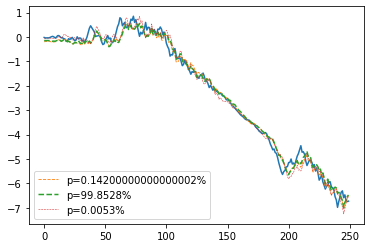

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


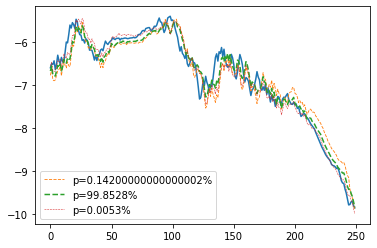

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


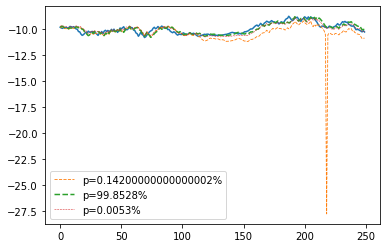

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


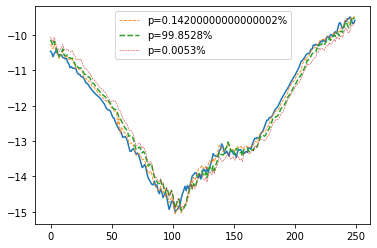

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


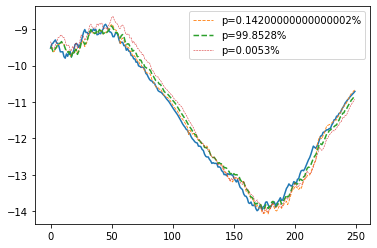

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


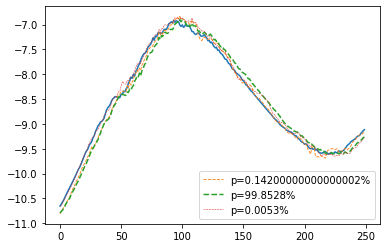

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


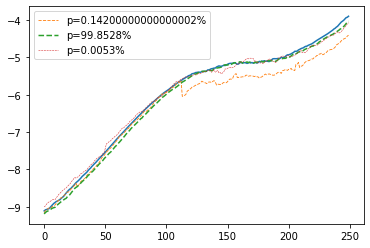

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


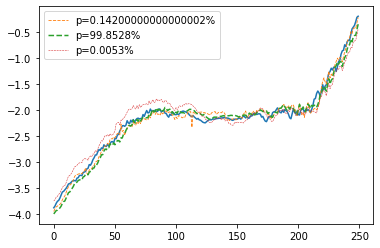

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


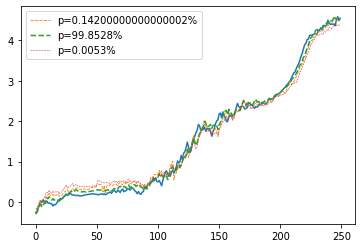

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


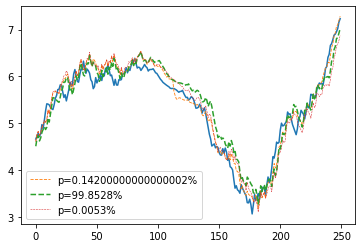

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


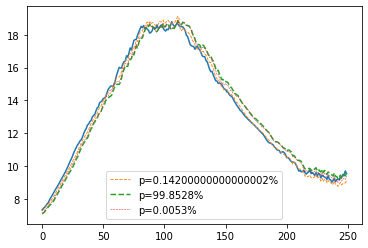

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


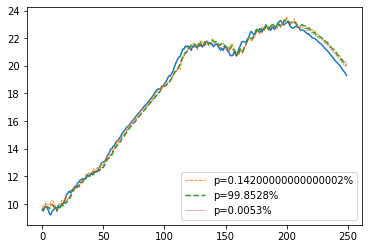

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


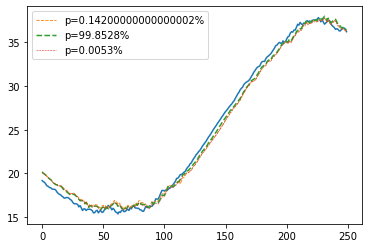

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


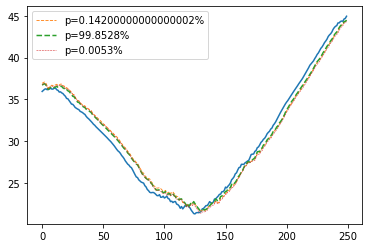

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


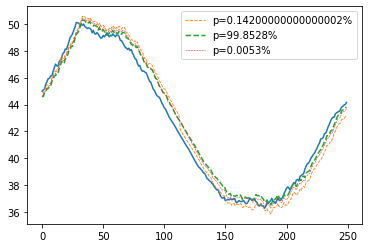

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


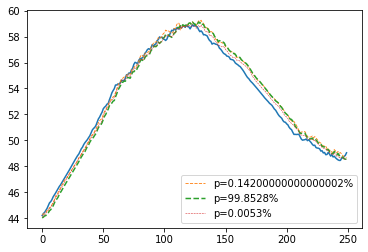

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


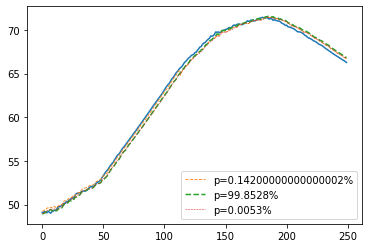

In [9]:
#train
#отрисовать факт синим
#Y_pred = model.predict(X_train,return_hist=True)
for episod in episodes_train:
    #мы учили систему выдавать последовательности длиной в 500/4, на более длинных система работать не обязана, 
    #так что тестим на последовательностях той же длины
    plt.plot(Y[episod[0]:episod[1],:])
    Y_pred = model.predict(X_train[episod[0]:episod[1],:],return_hist=True)
    [pred,p_array,m_pred] = Y_pred
    print('Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности')
    print('Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны')
    for i in range(len(pred)):
        if 15+np.log(p_array[i])>0:
            plt.plot(pred[i],'--',linewidth=0.1*np.max([15+np.log(p_array[i]),0] ), label=f'p={np.round(p_array[i], 6) * 100}%' )
    plt.legend()
    plt.show()

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


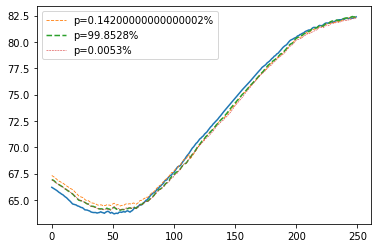

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


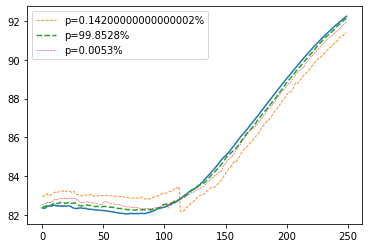

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


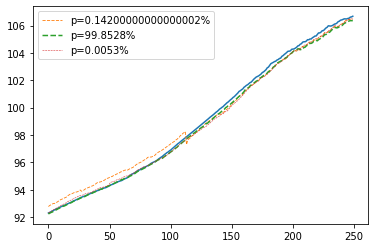

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


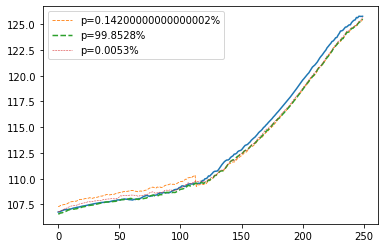

Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны


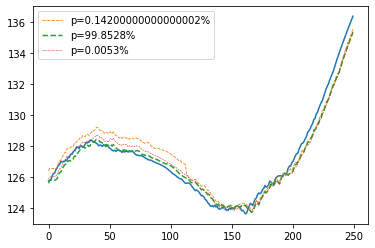

In [10]:
#test
#отрисовать факт синим
#Y_pred = model.predict(X_train,return_hist=True)
for episod in episodes_test:
    #мы учили систему выдавать последовательности длиной в 500/3, на более длинных система работать не обязана, 
    #так что тестим на последовательностях той же длины
    plt.plot(Y[episod[0]:episod[1],:])
    Y_pred = model.predict(X[episod[0]:episod[1],:],return_hist=True)
    [pred,p_array,m_pred] = Y_pred
    print('Отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности')
    print('Прогноз итеративный, но синюю линию агент вообще не видит, это Y, а агент видит переменные X, они не показаны')
    for i in range(len(pred)):
        if 15+np.log(p_array[i])>0:
            plt.plot(pred[i],'--',linewidth=0.1*np.max([15+np.log(p_array[i]),0] ), label=f'p={np.round(p_array[i], 6) * 100}%' )
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


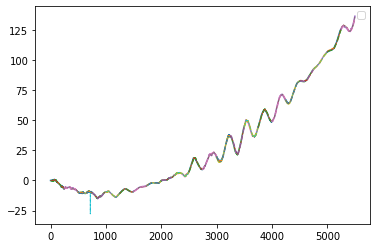

In [11]:
#Нарисовать прогноз всего ряда ЦЕЛИКОМ
for episod in episodes:
    #мы учили систему выдавать последовательности длиной в 500/4, на более длинных система работать не обязана, 
    #так что тестим на последовательностях той же длины
    plt.plot(np.arange(episod[0],episod[1]),Y[episod[0]:episod[1],:])
    Y_pred = model.predict(X[episod[0]:episod[1],:],return_hist=True)
    [pred,p_array,m_pred] = Y_pred
    for i in range(len(pred)):
        if 15+np.log(p_array[i])>0:
            plt.plot(np.arange(episod[0],episod[1]),pred[i],'--',linewidth=0.1*np.max([15+np.log(p_array[i]),0] ))
    #plt.legend()
    #plt.show()
    

plt.legend()
plt.show()

In [12]:
episodes

[[0, 250],
 [250, 500],
 [500, 750],
 [750, 1000],
 [1000, 1250],
 [1250, 1500],
 [1500, 1750],
 [1750, 2000],
 [2000, 2250],
 [2250, 2500],
 [2500, 2750],
 [2750, 3000],
 [3000, 3250],
 [3250, 3500],
 [3500, 3750],
 [3750, 4000],
 [4000, 4250],
 [4250, 4500],
 [4500, 4750],
 [4750, 5000],
 [5000, 5250],
 [5250, 5500]]

In [14]:
#делаем датасет
#Суть датасета: есть рандомные массивы, надо найти максимум
X_lst = []
Y_lst = []
for i in range(1000):
    X_rec = np.random.rand(6)*20
    Y_rec = [np.max(X_rec)]
    X_lst.append(X_rec)
    Y_lst.append(Y_rec)
X = np.array(X_lst)
Y = np.array(Y_lst,ndmin=2)

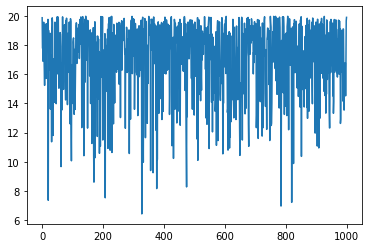

In [15]:
plt.plot(Y)

In [16]:
border = 500
X_train = X[:border,:]
X_test = X[border:,:]
Y_train = Y[:border,:]
Y_test = Y[border:,:]

In [17]:
%%time
model = symbolic_regression_multyboosting(size_genom=900,tact_count=50, regularization=1.)
episodes=[]
for i in range(len(Y_train)-1):
    episodes.append([i,i+1])
model = symbolic_regression_multyboosting(size_genom=900,tact_count=30, regularization=1.)
model.fit(X_train,Y_train,forest_count=20,sample_part=0.8,episodes=episodes,popsize=30, maxiter=3, boosting_count=2, alpha_count=5, elitarism=2, mutation_p=0.02)

FOREST NUMBER 0, episodes [[168 169]
 [ 15  16]
 [493 494]
 [ 72  73]
 [ 22  23]
 [299 300]
 [466 467]
 [ 75  76]
 [360 361]
 [263 264]
 [162 163]
 [433 434]
 [ 95  96]
 [ 75  76]
 [213 214]
 [ 47  48]
 [319 320]
 [287 288]
 [218 219]
 [404 405]
 [124 125]
 [116 117]
 [293 294]
 [167 168]
 [195 196]
 [102 103]
 [260 261]
 [426 427]
 [363 364]
 [ 51  52]
 [359 360]
 [ 38  39]
 [490 491]
 [ 33  34]
 [ 58  59]
 [380 381]
 [255 256]
 [323 324]
 [325 326]
 [ 88  89]
 [196 197]
 [302 303]
 [454 455]
 [351 352]
 [211 212]
 [121 122]
 [ 31  32]
 [450 451]
 [ 80  81]
 [ 52  53]
 [238 239]
 [460 461]
 [ 50  51]
 [132 133]
 [218 219]
 [319 320]
 [207 208]
 [ 49  50]
 [295 296]
 [430 431]
 [136 137]
 [434 435]
 [493 494]
 [271 272]
 [233 234]
 [493 494]
 [392 393]
 [247 248]
 [401 402]
 [406 407]
 [248 249]
 [373 374]
 [ 73  74]
 [185 186]
 [361 362]
 [366 367]
 [252 253]
 [474 475]
 [446 447]
 [ 83  84]
 [ 96  97]
 [ 43  44]
 [288 289]
 [ 26  27]
 [498 499]
 [392 393]
 [ 76  77]
 [254 255]
 [138 

selected linear model 0.05, mse 0.016316776762965307 [0.01736765761298624, 0.0228952982249871, 0.016330797217883226, 0.016944788368035424, 0.016317014635195762, 0.016316776762965307]
BOOST 0 ready. Score 0.03256632244987981.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003581020590957923 0.034822601839750326 0.020785219399653578 0.05666491780356357
iteration 0 y= [1.01259166 1.01260277 1.01273889 1.01295555 1.01423333 1.01444166
 1.01448889 1.01464444 1.01475833 1.01501111 1.01533611 1.01558055]
iteration 1 y= [1.01259166 1.01260277 1.01273889 1.01295555 1.01305555 1.01326389
 1.01369166 1.01390555 1.01418055 1.01423333 1.01444166 1.01448889]
iteration 2 y= [1.01198889 1.01259166 1.01260277 1.01273889 1.01295555 1.01305555
 1.01326389 1.01369166 1.01379722 1.01390555 1.0141     1.01418055]
iteration final y= [1.01198889 1.0124     1.01259166 1.01260277 1.01273889 1.01295555
 1.01305555 1.01326389 1.01369166 1.01379722 1.01390555 1.0141    ]
NOCOMPILED [   0.            0.     

selected linear model 1000, mse 1.6914682017771445 [1.9479405687538294, 2.3600676988384124, 1.7364065344108734, 1.6914682017771445, 1.7396006865886442, 1.7396637925607128]
BOOST 1 failed. Score:1.0143472188041633
err_sum,complexity 6.844869316876189 78
FOREST NUMBER 1, episodes [[  0   1]
 [ 41  42]
 [  0   1]
 [353 354]
 [356 357]
 [ 95  96]
 [471 472]
 [  9  10]
 [355 356]
 [464 465]
 [378 379]
 [188 189]
 [223 224]
 [474 475]
 [271 272]
 [163 164]
 [  8   9]
 [ 26  27]
 [333 334]
 [130 131]
 [ 24  25]
 [354 355]
 [417 418]
 [288 289]
 [ 53  54]
 [189 190]
 [483 484]
 [361 362]
 [ 37  38]
 [400 401]
 [133 134]
 [ 63  64]
 [400 401]
 [136 137]
 [208 209]
 [176 177]
 [354 355]
 [246 247]
 [180 181]
 [ 27  28]
 [ 88  89]
 [ 23  24]
 [422 423]
 [144 145]
 [ 50  51]
 [ 20  21]
 [426 427]
 [232 233]
 [156 157]
 [432 433]
 [254 255]
 [232 233]
 [465 466]
 [171 172]
 [228 229]
 [457 458]
 [374 375]
 [361 362]
 [ 85  86]
 [ 91  92]
 [182 183]
 [ 16  17]
 [219 220]
 [462 463]
 [343 344]
 [472 

selected boosting with linear layer, mse 0.009904144805216442 [0.009904144805216442, 0.01157915037714881, 0.014096236873980095, 0.0129079431981978, 0.014256641973199292, 0.014259909313556793]
BOOST 0 ready. Score 0.027694176761923154.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003581020590957923 0.03444568038572303 0.02077710848482031 0.05633802816926056
iteration 0 y= [1.00926517 1.01087073 1.01091517 1.01179295 1.01232351 1.01234851
 1.0128374  1.01285962 1.01305406 1.01315684 1.01329573 1.01335406]
iteration 1 y= [0.92702072 1.00926517 1.01087073 1.01091517 1.01179295 1.01232351
 1.01234851 1.0128374  1.01285962 1.01302351 1.01305406 1.01309017]
iteration 2 y= [0.92702072 1.00890684 1.00926517 1.0100624  1.01009017 1.01087073
 1.01090406 1.01091517 1.01109017 1.01114295 1.01115128 1.01152073]
iteration final y= [0.92702072 1.00890684 1.00926517 1.0100624  1.01009017 1.01087073
 1.01090406 1.01091517 1.01109017 1.01114295 1.01115128 1.01152073]
NOCOMPILED [   0.           

selected boosting with linear layer, mse 2.0593037327191106 [2.0593037327191106, 2.0843676700213964, 2.3254220194624002, 2.2409611519002093, 2.332507367589774, 2.3326488404912005]
BOOST 1 failed. Score:1.0183346175899501
err_sum,complexity 2.551679767157771 69
FOREST NUMBER 2, episodes [[348 349]
 [463 464]
 [318 319]
 [441 442]
 [140 141]
 [407 408]
 [262 263]
 [245 246]
 [136 137]
 [107 108]
 [191 192]
 [198 199]
 [ 27  28]
 [358 359]
 [287 288]
 [162 163]
 [  1   2]
 [167 168]
 [270 271]
 [ 81  82]
 [325 326]
 [178 179]
 [ 23  24]
 [277 278]
 [206 207]
 [260 261]
 [355 356]
 [177 178]
 [370 371]
 [398 399]
 [236 237]
 [308 309]
 [305 306]
 [195 196]
 [457 458]
 [417 418]
 [468 469]
 [218 219]
 [406 407]
 [285 286]
 [253 254]
 [363 364]
 [492 493]
 [428 429]
 [460 461]
 [385 386]
 [ 37  38]
 [240 241]
 [122 123]
 [115 116]
 [372 373]
 [359 360]
 [  5   6]
 [ 37  38]
 [420 421]
 [323 324]
 [458 459]
 [344 345]
 [302 303]
 [320 321]
 [ 33  34]
 [340 341]
 [468 469]
 [309 310]
 [390 391

selected linear model 0.05, mse 0.01651096391923653 [0.017753423193561425, 0.022938159614260916, 0.016548618889573312, 0.01762704892813885, 0.016511645022509874, 0.01651096391923653]
BOOST 0 ready. Score 0.02661050745734561.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003581020590957923 0.03415251136259846 0.02076124567485582 0.05612510076820121
iteration 0 y= [0.87096247 1.01762222 1.01837222 1.01909722 1.020275   1.02078055
 1.02094722 1.02125555 1.02166389 1.02173889 1.02181389 1.02186944]
iteration 1 y= [0.87096247 1.01762222 1.01837222 1.01872222 1.01872222 1.01872222
 1.01872222 1.01872222 1.01872222 1.01872222 1.01872222 1.01872222]
iteration 2 y= [0.87096247 1.01762222 1.01837222 1.01872222 1.01872222 1.01872222
 1.01872222 1.01872222 1.01872222 1.01872222 1.01872222 1.01872222]
iteration final y= [0.86180969 0.86205136 0.8620958  0.86303747 0.8685708  0.87096247
 1.01762222 1.01805555 1.01825277 1.01837222 1.01872222 1.01872222]
NOCOMPILED [1148.            0.       

selected boosting with linear layer, mse 1.4762948121058324 [1.4762948121058324, 1.661593993865447, 1.6801336044945174, 1.6526991649412097, 1.6821105816489874, 1.682149657578762]
BOOST 1 failed. Score:1.0187499963987043
err_sum,complexity 6.913200751355863 67
FOREST NUMBER 3, episodes [[241 242]
 [387 388]
 [ 93  94]
 [368 369]
 [170 171]
 [314 315]
 [253 254]
 [ 16  17]
 [216 217]
 [ 64  65]
 [306 307]
 [185 186]
 [127 128]
 [413 414]
 [124 125]
 [136 137]
 [308 309]
 [187 188]
 [369 370]
 [ 42  43]
 [163 164]
 [223 224]
 [ 69  70]
 [180 181]
 [151 152]
 [ 63  64]
 [218 219]
 [ 41  42]
 [388 389]
 [247 248]
 [295 296]
 [261 262]
 [195 196]
 [299 300]
 [439 440]
 [204 205]
 [  2   3]
 [487 488]
 [164 165]
 [ 72  73]
 [149 150]
 [229 230]
 [233 234]
 [ 20  21]
 [ 75  76]
 [454 455]
 [  7   8]
 [ 83  84]
 [  7   8]
 [192 193]
 [415 416]
 [ 96  97]
 [434 435]
 [340 341]
 [474 475]
 [ 39  40]
 [375 376]
 [ 34  35]
 [252 253]
 [ 33  34]
 [420 421]
 [490 491]
 [288 289]
 [ 11  12]
 [448 449]

selected boosting with linear layer, mse 0.01105524793155982 [0.01105524793155982, 0.013759760007957998, 0.015421409660249982, 0.014008615056311846, 0.015568419633667131, 0.015571379287904582]
BOOST 0 ready. Score 0.02772771723119144.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003581020590957923 0.033917661276692365 0.0207373271890553 0.055555555555784605
iteration 0 y= [0.91011498 1.01168007 1.01188562 1.01249118 1.01253007 1.01305507
 1.01337173 1.01350784 1.01362173 1.01417173 1.01429396 1.01497451]
iteration 1 y= [0.91011498 1.01168007 1.01188007 1.01188562 1.01249118 1.01253007
 1.01278007 1.01305507 1.01337173 1.01350784 1.01357729 1.01357729]
iteration 2 y= [0.91011498 0.91032053 0.9116372  1.01168007 1.01188007 1.01188562
 1.01249118 1.01253007 1.01278007 1.01305507 1.01328007 1.01337173]
iteration final y= [0.91011498 0.91032053 0.91057886 0.91120109 0.91134275 0.9116372
 0.91187609 0.91247053 0.91247053 0.91247053 0.91247053 0.91247053]
NOCOMPILED [1259.  762.  762

selected boosting with linear layer, mse 2.702584532858302 [2.702584532858302, 2.7140988735350513, 2.8768562820481156, 2.8413904466570594, 2.879396907094312, 2.8794471108238464]
BOOST 1 failed. Score:1.0196828449511082
err_sum,complexity 2.100630760297642 63
FOREST NUMBER 4, episodes [[388 389]
 [184 185]
 [243 244]
 [380 381]
 [444 445]
 [127 128]
 [362 363]
 [333 334]
 [255 256]
 [443 444]
 [239 240]
 [385 386]
 [165 166]
 [116 117]
 [125 126]
 [402 403]
 [ 80  81]
 [185 186]
 [ 62  63]
 [ 54  55]
 [414 415]
 [456 457]
 [397 398]
 [429 430]
 [415 416]
 [397 398]
 [ 94  95]
 [118 119]
 [155 156]
 [ 37  38]
 [165 166]
 [215 216]
 [193 194]
 [  4   5]
 [313 314]
 [331 332]
 [271 272]
 [136 137]
 [ 96  97]
 [237 238]
 [ 80  81]
 [354 355]
 [111 112]
 [108 109]
 [153 154]
 [306 307]
 [332 333]
 [298 299]
 [ 79  80]
 [203 204]
 [413 414]
 [114 115]
 [266 267]
 [254 255]
 [210 211]
 [139 140]
 [158 159]
 [299 300]
 [375 376]
 [ 38  39]
 [381 382]
 [201 202]
 [353 354]
 [242 243]
 [117 118]


selected boosting with linear layer, mse 0.013263919751896473 [0.013263919751896473, 0.01516654471894031, 0.015405752531904954, 0.01542022355540663, 0.01545641252357748, 0.015457482744997104]
BOOST 0 ready. Score 0.035150959538284704.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003577817531395349 0.03361362223551438 0.020718169645712804 0.05542735042760691
iteration 0 y= [1.02079981 1.02317203 1.02425537 1.02428315 1.02450537 1.02546092
 1.02594148 1.02616092 1.02723037 1.02769148 1.02774148 1.02781648]
iteration 1 y= [1.02079981 1.02317203 1.02425537 1.02428315 1.02450537 1.02453592
 1.02527481 1.02529981 1.02546092 1.02554703 1.02579148 1.02594148]
iteration 2 y= [1.02079981 1.02289426 1.02317203 1.0237637  1.02407481 1.02425537
 1.02428315 1.0243637  1.02450537 1.02453592 1.02464148 1.02464148]
iteration final y= [1.02079981 1.02206648 1.02234981 1.02289426 1.02317203 1.0237137
 1.0237637  1.02384703 1.02407481 1.02408592 1.02425537 1.02428315]
NOCOMPILED [ 705. 1289. 1223

selected boosting with linear layer, mse 2.390045404584278 [2.390045404584278, 2.4043473611830177, 2.530535781630802, 2.490995436162741, 2.5335412649861353, 2.53360091092235]
BOOST 1 failed. Score:1.017544256423863
err_sum,complexity 0.7973431681566524 89
FOREST NUMBER 5, episodes [[116 117]
 [454 455]
 [126 127]
 [485 486]
 [265 266]
 [205 206]
 [170 171]
 [185 186]
 [ 52  53]
 [454 455]
 [247 248]
 [ 63  64]
 [392 393]
 [  1   2]
 [276 277]
 [269 270]
 [ 20  21]
 [336 337]
 [363 364]
 [ 38  39]
 [107 108]
 [246 247]
 [284 285]
 [ 27  28]
 [227 228]
 [335 336]
 [  2   3]
 [ 15  16]
 [383 384]
 [245 246]
 [255 256]
 [327 328]
 [119 120]
 [150 151]
 [297 298]
 [  9  10]
 [266 267]
 [231 232]
 [ 37  38]
 [151 152]
 [ 26  27]
 [489 490]
 [382 383]
 [118 119]
 [229 230]
 [126 127]
 [182 183]
 [350 351]
 [105 106]
 [379 380]
 [  3   4]
 [ 97  98]
 [236 237]
 [ 42  43]
 [272 273]
 [389 390]
 [434 435]
 [487 488]
 [ 96  97]
 [137 138]
 [195 196]
 [343 344]
 [441 442]
 [470 471]
 [241 242]
 [1

selected boosting with linear layer, mse 0.012912224588230768 [0.012912224588230768, 0.01603625778335181, 0.01415464154435532, 0.013724275914696786, 0.014223056361049853, 0.01422445058800203]
BOOST 0 ready. Score 0.028078634133094322.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003577817531395349 0.03347280334748954 0.020689655172528732 0.0551558753
iteration 0 y= [1.01577034 1.01889812 1.01926478 1.01931478 1.01999812 1.02134534
 1.02152867 1.02256756 1.02297312 1.02331756 1.02336201 1.02373701]
iteration 1 y= [1.01577034 1.01889812 1.01926478 1.01931478 1.01999812 1.02004812
 1.0206759  1.02072867 1.02077312 1.02082034 1.02103978 1.02134534]
iteration 2 y= [1.01577034 1.01860645 1.01863978 1.01889812 1.01924812 1.01926478
 1.01931478 1.01999812 1.02004812 1.0206759  1.02072034 1.02072867]
iteration final y= [1.01577034 1.01762312 1.01778701 1.01860645 1.01863978 1.01889812
 1.01890923 1.01915923 1.01924812 1.01926478 1.01931478 1.01951478]
NOCOMPILED [ 709.  977. 1102.  790

selected boosting with linear layer, mse 3.7800787297493463 [3.7800787297493463, 3.792498556521278, 3.9361573901161413, 3.899101976434295, 3.9386725126559616, 3.9387220474987092]
BOOST 1 failed. Score:1.0212036729275058
err_sum,complexity 2.0291923142813237 60
FOREST NUMBER 6, episodes [[ 51  52]
 [ 63  64]
 [227 228]
 [120 121]
 [ 29  30]
 [ 95  96]
 [437 438]
 [266 267]
 [413 414]
 [276 277]
 [ 40  41]
 [426 427]
 [292 293]
 [392 393]
 [451 452]
 [225 226]
 [ 18  19]
 [159 160]
 [146 147]
 [221 222]
 [358 359]
 [289 290]
 [437 438]
 [466 467]
 [310 311]
 [171 172]
 [194 195]
 [427 428]
 [439 440]
 [150 151]
 [ 86  87]
 [170 171]
 [308 309]
 [306 307]
 [201 202]
 [248 249]
 [281 282]
 [494 495]
 [424 425]
 [366 367]
 [453 454]
 [488 489]
 [  2   3]
 [429 430]
 [220 221]
 [286 287]
 [ 22  23]
 [170 171]
 [203 204]
 [112 113]
 [107 108]
 [ 41  42]
 [255 256]
 [444 445]
 [145 146]
 [362 363]
 [119 120]
 [293 294]
 [227 228]
 [435 436]
 [359 360]
 [ 66  67]
 [236 237]
 [230 231]
 [381 382

selected linear model 0.05, mse 0.01566610360297502 [0.017511326591222207, 0.02117675389442109, 0.01577076825709281, 0.017650582949260543, 0.015668094664518694, 0.01566610360297502]
BOOST 0 ready. Score 0.03565643971316795.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.00356824264058876 0.0332480818415601 0.02065405154900403 0.0547806274141313
iteration 0 y= [1.03237777 1.03411111 1.03464722 1.03493055 1.03691944 1.03883611
 1.03924722 1.03985833 1.03989722 1.03995555 1.03999722 1.04026388]
iteration 1 y= [1.03208611 1.03220277 1.03237777 1.03411111 1.03458333 1.03464722
 1.03485833 1.03493055 1.03513888 1.03543055 1.03558888 1.03563055]
iteration 2 y= [0.89938844 1.03208611 1.0322     1.03220277 1.03229722 1.03237777
 1.03266388 1.03269722 1.033125   1.03318333 1.03320277 1.03391666]
iteration final y= [0.89938844 1.03114166 1.0317     1.03208611 1.0322     1.03220277
 1.03229722 1.03237777 1.03258333 1.03266388 1.03269722 1.03311388]
NOCOMPILED [   0.            0.           

selected linear model 1000, mse 1.6985216985666214 [1.7780172509726342, 2.0710067149008586, 1.7554728230442713, 1.6985216985666214, 1.7600364563922402, 1.7601273965444322]
BOOST 1 failed. Score:1.0362416621115749
err_sum,complexity 7.0693765370764 71
FOREST NUMBER 7, episodes [[183 184]
 [120 121]
 [ 59  60]
 [276 277]
 [ 16  17]
 [  7   8]
 [ 32  33]
 [197 198]
 [ 20  21]
 [432 433]
 [413 414]
 [ 50  51]
 [ 90  91]
 [126 127]
 [279 280]
 [274 275]
 [371 372]
 [ 81  82]
 [423 424]
 [ 30  31]
 [193 194]
 [167 168]
 [ 75  76]
 [420 421]
 [180 181]
 [430 431]
 [309 310]
 [ 47  48]
 [179 180]
 [308 309]
 [  3   4]
 [369 370]
 [298 299]
 [315 316]
 [449 450]
 [ 99 100]
 [407 408]
 [333 334]
 [ 75  76]
 [395 396]
 [452 453]
 [ 11  12]
 [ 78  79]
 [477 478]
 [ 97  98]
 [261 262]
 [265 266]
 [278 279]
 [229 230]
 [214 215]
 [ 90  91]
 [357 358]
 [406 407]
 [362 363]
 [238 239]
 [341 342]
 [485 486]
 [164 165]
 [119 120]
 [403 404]
 [ 17  18]
 [307 308]
 [473 474]
 [102 103]
 [278 279]
 [428 42

selected linear model 50, mse 0.014798559109393044 [0.016208013372044184, 0.019934720974492517, 0.014798559109393044, 0.014975853182502295, 0.014815436940924806, 0.014815804340216463]
BOOST 0 ready. Score 0.04577649840011094.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.00356824264058876 0.033078880407379135 0.020631067961286404 0.05381944444453125
iteration 0 y= [1.01849445 1.01996945 1.02012778 1.02030556 1.02034723 1.02055556
 1.020775   1.02086112 1.02136667 1.02160556 1.02171667 1.02201389]
iteration 1 y= [1.01849445 1.01866389 1.01996945 1.02012778 1.02030556 1.02034723
 1.02055556 1.02067778 1.020775   1.02080834 1.02086112 1.02136667]
iteration 2 y= [1.01849445 1.01866389 1.01866667 1.018875   1.01971667 1.01996945
 1.02005834 1.02006945 1.02011389 1.02012778 1.02025278 1.02030556]
iteration final y= [1.01849445 1.01866389 1.01866667 1.018875   1.01913889 1.01941945
 1.01964723 1.01966945 1.01971667 1.01983889 1.01996945 1.02005834]
NOCOMPILED [1239.  778. 1239.  717. 

selected boosting with linear layer, mse 1.5677041315622167 [1.5677041315622167, 1.7333292743732447, 1.6756056201692267, 1.667180932828615, 1.6761977791720604, 1.6762094651338741]
BOOST 1 failed. Score:1.0208111160764213
err_sum,complexity 6.877393578013352 82
FOREST NUMBER 8, episodes [[484 485]
 [481 482]
 [121 122]
 [336 337]
 [497 498]
 [286 287]
 [495 496]
 [250 251]
 [179 180]
 [145 146]
 [356 357]
 [486 487]
 [131 132]
 [258 259]
 [ 16  17]
 [236 237]
 [219 220]
 [417 418]
 [291 292]
 [156 157]
 [126 127]
 [128 129]
 [ 37  38]
 [338 339]
 [423 424]
 [196 197]
 [ 92  93]
 [423 424]
 [105 106]
 [466 467]
 [200 201]
 [ 88  89]
 [443 444]
 [289 290]
 [461 462]
 [198 199]
 [331 332]
 [ 85  86]
 [ 70  71]
 [274 275]
 [167 168]
 [296 297]
 [458 459]
 [362 363]
 [323 324]
 [130 131]
 [158 159]
 [309 310]
 [372 373]
 [377 378]
 [495 496]
 [284 285]
 [ 97  98]
 [149 150]
 [ 80  81]
 [ 18  19]
 [470 471]
 [257 258]
 [261 262]
 [195 196]
 [336 337]
 [160 161]
 [476 477]
 [243 244]
 [489 490

selected boosting with linear layer, mse 0.007898631007856859 [0.007898631007856859, 0.008085716133103053, 0.015687785342959067, 0.015689294017835795, 0.015728061100797806, 0.01572890517376126]
BOOST 0 ready. Score 0.02867741482869378.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.00356824264058876 0.032990438741336496 0.020618556701145475 0.05352519029464692
iteration 0 y= [1.01692557 1.02149501 1.02376723 1.02547557 1.0272589  1.02741168
 1.02750334 1.02781446 1.02796446 1.02899779 1.02926446 1.02938946]
iteration 1 y= [1.01692557 1.02087279 1.02149501 1.02197834 1.02268112 1.02349223
 1.02376723 1.02382557 1.02384223 1.0245339  1.02454501 1.02471446]
iteration 2 y= [1.01692557 1.02087279 1.02092001 1.0211839  1.02145334 1.02149501
 1.02175334 1.02183112 1.02197834 1.02200612 1.02201168 1.0222339 ]
iteration final y= [1.01692557 1.02083112 1.02087279 1.02092001 1.02116446 1.0211839
 1.02145334 1.02149501 1.02155334 1.02172834 1.02172834 1.02172834]
NOCOMPILED [1203.  813.  97

selected linear model 1000, mse 2.2613981569436192 [2.4185140275029404, 2.4539369298212588, 2.3102631641984237, 2.2613981569436192, 2.3139609701481993, 2.314034385170238]
BOOST 1 failed. Score:1.0176311219024863
err_sum,complexity 1.7178862866790254 73
FOREST NUMBER 9, episodes [[450 451]
 [485 486]
 [365 366]
 [237 238]
 [158 159]
 [354 355]
 [378 379]
 [152 153]
 [231 232]
 [471 472]
 [318 319]
 [156 157]
 [142 143]
 [439 440]
 [140 141]
 [251 252]
 [481 482]
 [ 88  89]
 [496 497]
 [ 80  81]
 [ 93  94]
 [339 340]
 [149 150]
 [199 200]
 [405 406]
 [362 363]
 [145 146]
 [190 191]
 [486 487]
 [378 379]
 [306 307]
 [150 151]
 [ 13  14]
 [336 337]
 [345 346]
 [338 339]
 [207 208]
 [236 237]
 [196 197]
 [ 95  96]
 [126 127]
 [273 274]
 [267 268]
 [223 224]
 [188 189]
 [ 16  17]
 [244 245]
 [359 360]
 [467 468]
 [417 418]
 [204 205]
 [  2   3]
 [ 60  61]
 [283 284]
 [145 146]
 [ 21  22]
 [  1   2]
 [ 22  23]
 [182 183]
 [452 453]
 [ 78  79]
 [284 285]
 [417 418]
 [414 415]
 [ 50  51]
 [ 75 

selected linear model 1000, mse 0.014425899479246605 [0.01862359280571824, 0.024397162520094384, 0.014430601767671927, 0.014425899479246605, 0.0144560516232727, 0.014456582467043675]
BOOST 0 ready. Score 0.03114874929939187.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0035429583703277235 0.03274559193979849 0.020594965675171623 0.052790094709840266
iteration 0 y= [1.01681278 1.01762111 1.01786833 1.01886833 1.01946833 1.02002111
 1.02020722 1.02026    1.02096556 1.02100722 1.02122945 1.02125722]
iteration 1 y= [1.01681278 1.01762111 1.01786833 1.01817111 1.01853778 1.01873222
 1.018835   1.01886833 1.01895445 1.01913222 1.01939056 1.01942945]
iteration 2 y= [1.01681278 1.01724056 1.01762111 1.01786833 1.01817111 1.01853778
 1.01861    1.01873222 1.018835   1.01884056 1.01886833 1.01895445]
iteration final y= [1.01681278 1.01724056 1.01762111 1.01786833 1.01817111 1.018185
 1.01853778 1.01861    1.01866556 1.01873222 1.018835   1.01884056]
NOCOMPILED [ 862.  803. 1207.  772.  

selected boosting with linear layer, mse 1.3698274645547757 [1.3698274645547757, 1.4674343832298136, 1.7271563668021424, 1.7082291467721376, 1.7285185219091113, 1.7285454549166017]
BOOST 1 failed. Score:1.012393334256449
err_sum,complexity 6.844759500152541 72
FOREST NUMBER 10, episodes [[311 312]
 [265 266]
 [168 169]
 [193 194]
 [299 300]
 [269 270]
 [229 230]
 [385 386]
 [466 467]
 [296 297]
 [136 137]
 [397 398]
 [  8   9]
 [228 229]
 [ 54  55]
 [ 41  42]
 [263 264]
 [130 131]
 [ 55  56]
 [ 92  93]
 [351 352]
 [150 151]
 [292 293]
 [ 54  55]
 [262 263]
 [452 453]
 [ 16  17]
 [125 126]
 [  9  10]
 [ 25  26]
 [123 124]
 [382 383]
 [ 55  56]
 [374 375]
 [349 350]
 [458 459]
 [  2   3]
 [262 263]
 [376 377]
 [141 142]
 [429 430]
 [251 252]
 [109 110]
 [364 365]
 [165 166]
 [ 67  68]
 [ 17  18]
 [151 152]
 [485 486]
 [393 394]
 [293 294]
 [364 365]
 [183 184]
 [193 194]
 [212 213]
 [ 95  96]
 [394 395]
 [275 276]
 [456 457]
 [111 112]
 [357 358]
 [376 377]
 [ 75  76]
 [112 113]
 [399 40

selected boosting with linear layer, mse 0.012712628766354383 [0.012712628766354383, 0.014290425306647729, 0.015267778379863558, 0.015239732232152518, 0.015300697063799778, 0.015301384347215384]
BOOST 0 ready. Score 0.029340388477326146.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0035429583703277235 0.03270985529924146 0.020571428571542854 0.05242536237489487
iteration 0 y= [1.02021356 1.02021634 1.0209719  1.02122468 1.02143301 1.02268856
 1.02278579 1.02324412 1.02359134 1.0236469  1.02444412 1.02453301]
iteration 1 y= [1.02021356 1.02021634 1.0209719  1.0209969  1.02122468 1.02143301
 1.02207468 1.02207468 1.02207468 1.02207468 1.02207468 1.02207468]
iteration 2 y= [1.02021356 1.02021634 1.02058301 1.02070245 1.02070245 1.02070245
 1.02070245 1.02070245 1.02070245 1.02070245 1.02070245 1.02070245]
iteration final y= [1.02021356 1.02021634 1.0202969  1.02034968 1.02058301 1.02070245
 1.02070245 1.02070245 1.02070245 1.02070245 1.02070245 1.02070245]
NOCOMPILED [ 921.  977.

selected boosting with linear layer, mse 2.108390544506562 [2.108390544506562, 2.2424901394918515, 2.1814657571336458, 2.172220243865303, 2.182187549438234, 2.182201887618002]
BOOST 1 failed. Score:1.016533009330517
err_sum,complexity 1.0973758504692201 71
FOREST NUMBER 11, episodes [[385 386]
 [142 143]
 [341 342]
 [ 58  59]
 [235 236]
 [496 497]
 [ 55  56]
 [ 89  90]
 [328 329]
 [384 385]
 [261 262]
 [ 75  76]
 [360 361]
 [114 115]
 [356 357]
 [201 202]
 [ 11  12]
 [431 432]
 [199 200]
 [397 398]
 [368 369]
 [152 153]
 [ 47  48]
 [125 126]
 [134 135]
 [ 68  69]
 [ 52  53]
 [155 156]
 [187 188]
 [257 258]
 [337 338]
 [ 43  44]
 [ 29  30]
 [432 433]
 [200 201]
 [451 452]
 [409 410]
 [370 371]
 [106 107]
 [246 247]
 [ 58  59]
 [287 288]
 [175 176]
 [183 184]
 [  3   4]
 [ 73  74]
 [495 496]
 [121 122]
 [ 61  62]
 [205 206]
 [454 455]
 [255 256]
 [402 403]
 [ 35  36]
 [461 462]
 [311 312]
 [ 15  16]
 [458 459]
 [180 181]
 [ 94  95]
 [446 447]
 [452 453]
 [434 435]
 [277 278]
 [426 427]
 

selected boosting with linear layer, mse 0.01054905222981807 [0.01054905222981807, 0.011061889395717712, 0.01584221785256024, 0.016655838395078712, 0.015815069135614156, 0.01581457458863318]
BOOST 0 ready. Score 0.024992669784588424.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0035429583703277235 0.03245192307704327 0.02052451539350057 0.05194805194823748
iteration 0 y= [0.94012685 1.01758069 1.01845569 1.0218918  1.02239458 1.02255847
 1.02262236 1.02342791 1.0243918  1.02495291 1.02544736 1.02590014]
iteration 1 y= [0.93794074 0.94012685 1.01758069 1.01803625 1.01845569 1.01859458
 1.01860847 1.01897514 1.01927791 1.01929458 1.01934736 1.01962236]
iteration 2 y= [0.93794074 0.93831018 0.9385824  0.93981574 0.94012685 0.94119074
 0.94124351 0.94148796 0.94177962 0.94178796 0.94184351 0.94235185]
iteration final y= [0.93794074 0.93831018 0.93842962 0.9385824  0.93891574 0.93891574
 0.93891574 0.93891574 0.93891574 0.93891574 0.93891574 0.93891574]
NOCOMPILED [   0.           

selected boosting with linear layer, mse 2.459916378595313 [2.459916378595313, 2.5320986918964827, 2.510452751971166, 2.4713656758057985, 2.5132482878716127, 2.513303536650728]
BOOST 1 failed. Score:1.0253306912721327
err_sum,complexity 1.0521089573847295 69
FOREST NUMBER 12, episodes [[240 241]
 [342 343]
 [455 456]
 [412 413]
 [307 308]
 [385 386]
 [234 235]
 [ 47  48]
 [464 465]
 [ 42  43]
 [293 294]
 [107 108]
 [178 179]
 [334 335]
 [195 196]
 [234 235]
 [209 210]
 [346 347]
 [317 318]
 [257 258]
 [339 340]
 [222 223]
 [492 493]
 [ 88  89]
 [ 40  41]
 [296 297]
 [279 280]
 [ 77  78]
 [241 242]
 [ 34  35]
 [250 251]
 [ 46  47]
 [495 496]
 [167 168]
 [ 85  86]
 [452 453]
 [151 152]
 [ 27  28]
 [347 348]
 [248 249]
 [402 403]
 [ 81  82]
 [134 135]
 [  9  10]
 [348 349]
 [143 144]
 [381 382]
 [396 397]
 [132 133]
 [391 392]
 [297 298]
 [307 308]
 [ 37  38]
 [267 268]
 [254 255]
 [107 108]
 [261 262]
 [ 93  94]
 [ 50  51]
 [140 141]
 [238 239]
 [428 429]
 [489 490]
 [482 483]
 [470 471]

selected boosting with linear layer, mse 0.008817596273872873 [0.008817596273872873, 0.009700337562167009, 0.01780570364411238, 0.018823213102186428, 0.01778831178597813, 0.01778804804077994]
BOOST 0 ready. Score 0.028775596488797094.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.0035429583703277235 0.032330334118111675 0.020477815699772466 0.05159370199727918
iteration 0 y= [1.00866899 1.00918843 1.00927732 1.01020788 1.01039399 1.0107051
 1.01071343 1.01071621 1.01076621 1.01081343 1.01120232 1.01142732]
iteration 1 y= [1.00866899 1.00918843 1.00927732 1.01020788 1.01039399 1.0107051
 1.01071343 1.01071621 1.01076621 1.01081343 1.01091621 1.01120232]
iteration 2 y= [1.00866899 1.00918843 1.00918843 1.00927732 1.00950788 1.0097551
 1.01020788 1.01025788 1.01036066 1.01039399 1.01040788 1.01056066]
iteration final y= [1.00866899 1.00918843 1.00918843 1.00927732 1.00950788 1.00962732
 1.0097551  1.01020788 1.01024121 1.01025788 1.01036066 1.01039399]
NOCOMPILED [ 930.  798.  994

selected boosting without linear layer, mse 2.86234870803333 [2.8808906783589214, 2.86234870803333, 3.032662003186589, 2.986766052531379, 3.0359171361730306, 3.0359814327002748]
BOOST 1 failed. Score:1.0121995440717444
err_sum,complexity 0.9008515653290552 69
FOREST NUMBER 13, episodes [[276 277]
 [226 227]
 [127 128]
 [340 341]
 [267 268]
 [448 449]
 [150 151]
 [147 148]
 [104 105]
 [258 259]
 [104 105]
 [359 360]
 [227 228]
 [174 175]
 [ 29  30]
 [104 105]
 [443 444]
 [368 369]
 [354 355]
 [425 426]
 [224 225]
 [384 385]
 [403 404]
 [ 51  52]
 [363 364]
 [355 356]
 [440 441]
 [304 305]
 [319 320]
 [ 10  11]
 [ 95  96]
 [194 195]
 [304 305]
 [130 131]
 [ 62  63]
 [212 213]
 [410 411]
 [ 87  88]
 [321 322]
 [382 383]
 [485 486]
 [379 380]
 [275 276]
 [388 389]
 [ 63  64]
 [475 476]
 [282 283]
 [ 71  72]
 [258 259]
 [415 416]
 [385 386]
 [270 271]
 [451 452]
 [260 261]
 [415 416]
 [ 56  57]
 [172 173]
 [132 133]
 [289 290]
 [363 364]
 [118 119]
 [304 305]
 [150 151]
 [472 473]
 [371 372

selected linear model 1000, mse 0.014380857956471831 [0.016344789604719103, 0.020345383879792744, 0.014726472844356547, 0.014380857956471831, 0.014785052485668868, 0.014786249144309755]
BOOST 0 ready. Score 0.024869598961137086.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003539823008938053 0.03189031971957017 0.020477815699772466 0.05138339920988142
iteration 0 y= [1.00664898 1.00828509 1.00857121 1.00867954 1.00895454 1.00914065
 1.00958787 1.00959898 1.01002954 1.01014621 1.01018232 1.01018509]
iteration 1 y= [1.00664898 1.00828509 1.00857121 1.00867954 1.00895454 1.00914065
 1.00944621 1.00958787 1.00959898 1.00969898 1.00979621 1.01002954]
iteration 2 y= [1.00664898 1.00828509 1.00857121 1.00867954 1.00895454 1.00914065
 1.00936009 1.00936009 1.00936009 1.00936009 1.00936009 1.00936009]
iteration final y= [1.00664898 1.00819065 1.00828509 1.00855454 1.00857121 1.00867954
 1.00871843 1.00895454 1.00914065 1.00919898 1.00922676 1.00924898]
NOCOMPILED [ 933. 1051.  998.  98

selected linear model 1000, mse 1.7304559948988743 [1.8520336767691292, 1.9461993787480634, 1.7713424724160447, 1.7304559948988743, 1.7746464058830977, 1.7747122161948576]
BOOST 1 failed. Score:1.0098212055013152
err_sum,complexity 6.85756229317464 69
FOREST NUMBER 14, episodes [[356 357]
 [112 113]
 [484 485]
 [389 390]
 [404 405]
 [486 487]
 [168 169]
 [384 385]
 [253 254]
 [370 371]
 [329 330]
 [299 300]
 [137 138]
 [241 242]
 [173 174]
 [ 75  76]
 [378 379]
 [306 307]
 [273 274]
 [214 215]
 [221 222]
 [181 182]
 [ 19  20]
 [ 36  37]
 [286 287]
 [261 262]
 [ 79  80]
 [130 131]
 [460 461]
 [397 398]
 [434 435]
 [487 488]
 [496 497]
 [186 187]
 [355 356]
 [231 232]
 [136 137]
 [271 272]
 [487 488]
 [ 66  67]
 [156 157]
 [105 106]
 [487 488]
 [291 292]
 [352 353]
 [242 243]
 [351 352]
 [141 142]
 [ 40  41]
 [401 402]
 [437 438]
 [ 12  13]
 [ 23  24]
 [491 492]
 [276 277]
 [324 325]
 [301 302]
 [ 15  16]
 [153 154]
 [123 124]
 [370 371]
 [162 163]
 [ 38  39]
 [246 247]
 [129 130]
 [349 

selected boosting with linear layer, mse 0.01022955096705305 [0.01022955096705305, 0.012377026911155166, 0.012368895561068832, 0.011479833196628274, 0.012483262592561143, 0.012485593933527321]
BOOST 0 ready. Score 0.025393952618854687.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003539823008938053 0.03186022610493319 0.020419745650998546 0.05124749464395445
iteration 0 y= [1.00771826 1.00790715 1.00796549 1.00821549 1.00859049 1.0086766
 1.00873771 1.00892937 1.00904882 1.00918771 1.00944049 1.00944326]
iteration 1 y= [1.00771826 1.00790715 1.00796549 1.00816826 1.00821549 1.00859049
 1.0086766  1.00873771 1.00892937 1.00900993 1.00900993 1.00900993]
iteration 2 y= [1.00741271 1.00771826 1.00790715 1.00796549 1.00816826 1.00821549
 1.00859049 1.0086766  1.00873771 1.00892937 1.00897937 1.00900993]
iteration final y= [1.00741271 1.00771826 1.00790715 1.00796549 1.00813771 1.00816826
 1.00821549 1.00851826 1.00859049 1.00862382 1.00862382 1.00862382]
NOCOMPILED [   0.          

selected boosting with linear layer, mse 2.009622927069756 [2.009622927069756, 2.032339973854734, 2.445050030611024, 2.397487312278294, 2.4486657955652213, 2.448737574491365]
BOOST 1 failed. Score:1.0101932628479087
err_sum,complexity 0.9202662642597639 66
FOREST NUMBER 15, episodes [[251 252]
 [236 237]
 [427 428]
 [ 14  15]
 [148 149]
 [ 92  93]
 [246 247]
 [432 433]
 [230 231]
 [383 384]
 [379 380]
 [268 269]
 [131 132]
 [109 110]
 [ 65  66]
 [238 239]
 [364 365]
 [260 261]
 [335 336]
 [ 27  28]
 [104 105]
 [243 244]
 [426 427]
 [318 319]
 [ 44  45]
 [295 296]
 [ 37  38]
 [410 411]
 [158 159]
 [391 392]
 [205 206]
 [283 284]
 [189 190]
 [ 51  52]
 [ 16  17]
 [125 126]
 [210 211]
 [ 61  62]
 [340 341]
 [224 225]
 [182 183]
 [234 235]
 [ 74  75]
 [407 408]
 [245 246]
 [335 336]
 [ 64  65]
 [346 347]
 [438 439]
 [180 181]
 [437 438]
 [450 451]
 [432 433]
 [180 181]
 [466 467]
 [188 189]
 [269 270]
 [381 382]
 [350 351]
 [ 59  60]
 [447 448]
 [262 263]
 [411 412]
 [369 370]
 [251 252]
 

selected boosting with linear layer, mse 0.010047890726173021 [0.010047890726173021, 0.01244982811994153, 0.014903128282737526, 0.015127776131119968, 0.014939837544198526, 0.014940628660257157]
BOOST 0 ready. Score 0.026811770921639694.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003539823008938053 0.03173790840122441 0.020385050962740656 0.05118446158426395
iteration 0 y= [0.90525543 0.90572487 1.00731688 1.00772243 1.0081141  1.00900577
 1.0092141  1.00986965 1.01050299 1.01127243 1.01129743 1.01143354]
iteration 1 y= [0.89580086 0.90525543 0.90572487 0.90699987 0.90708043 0.90725542
 0.90733876 0.90752209 0.90769987 0.90769987 0.90769987 0.90769987]
iteration 2 y= [0.89580086 0.90525543 0.90570265 0.90572487 0.90619987 0.90679432
 0.90699987 0.90708043 0.90714154 0.90725542 0.90733876 0.90739709]
iteration final y= [0.89580086 0.90525543 0.90570265 0.90572487 0.90611098 0.90619987
 0.90639154 0.90654987 0.90663043 0.90679432 0.90699432 0.90699987]
NOCOMPILED [   0.        

selected boosting with linear layer, mse 1.8759515852023887 [1.8759515852023887, 1.9325184834596432, 2.077556643067926, 2.0615292341637974, 2.0787047868240665, 2.0787274697825127]
BOOST 1 failed. Score:1.0153863214812011
err_sum,complexity 0.8483568061114257 66
FOREST NUMBER 16, episodes [[338 339]
 [125 126]
 [100 101]
 [177 178]
 [452 453]
 [177 178]
 [380 381]
 [395 396]
 [417 418]
 [ 11  12]
 [381 382]
 [ 48  49]
 [370 371]
 [264 265]
 [128 129]
 [459 460]
 [410 411]
 [ 40  41]
 [ 40  41]
 [ 56  57]
 [217 218]
 [239 240]
 [ 37  38]
 [453 454]
 [490 491]
 [219 220]
 [220 221]
 [107 108]
 [126 127]
 [267 268]
 [261 262]
 [ 13  14]
 [397 398]
 [363 364]
 [498 499]
 [251 252]
 [476 477]
 [268 269]
 [ 54  55]
 [390 391]
 [421 422]
 [323 324]
 [225 226]
 [ 34  35]
 [209 210]
 [322 323]
 [366 367]
 [339 340]
 [  8   9]
 [127 128]
 [382 383]
 [315 316]
 [228 229]
 [375 376]
 [428 429]
 [ 53  54]
 [ 95  96]
 [309 310]
 [ 59  60]
 [474 475]
 [306 307]
 [468 469]
 [248 249]
 [227 228]
 [150 1

selected boosting without linear layer, mse 0.01024506850987105 [0.010297236325000356, 0.01024506850987105, 0.016823198354323277, 0.0169275574896837, 0.016850235663191743, 0.016850810447069778]
BOOST 0 ready. Score 0.025911020238508435.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003539823008938053 0.031522747226262054 0.020359958815518973 0.05094067849700372
iteration 0 y= [1.00150071 1.00398682 1.00406737 1.00506182 1.00524515 1.00535904
 1.00575348 1.00599237 1.00616737 1.00653126 1.00659237 1.00698404]
iteration 1 y= [1.00098682 1.00150071 1.00294793 1.00398682 1.00406737 1.00437571
 1.00460348 1.00472293 1.00505348 1.00506182 1.00511182 1.00517015]
iteration 2 y= [1.00098682 1.00150071 1.0024146  1.00283404 1.00294793 1.00310071
 1.00322571 1.00346182 1.00347571 1.00348682 1.00360348 1.00378126]
iteration final y= [1.00098682 1.00150071 1.00229515 1.00233404 1.00233404 1.00233404
 1.00233404 1.00233404 1.00233404 1.00233404 1.00233404 1.00233404]
NOCOMPILED [   0.       

selected boosting without linear layer, mse 10.780111684119278 [10.780348354565769, 10.780111684119278, 10.780365041531422, 10.780318689901552, 10.780368067203606, 10.780368126657002]
BOOST 1 failed. Score:1.0044118177986139
err_sum,complexity 1.5644674918294963 69
FOREST NUMBER 17, episodes [[ 70  71]
 [210 211]
 [246 247]
 [ 98  99]
 [122 123]
 [328 329]
 [243 244]
 [164 165]
 [ 17  18]
 [449 450]
 [489 490]
 [ 34  35]
 [ 52  53]
 [450 451]
 [434 435]
 [379 380]
 [ 86  87]
 [ 32  33]
 [448 449]
 [ 48  49]
 [105 106]
 [136 137]
 [312 313]
 [398 399]
 [450 451]
 [ 41  42]
 [213 214]
 [493 494]
 [245 246]
 [181 182]
 [340 341]
 [188 189]
 [389 390]
 [430 431]
 [314 315]
 [169 170]
 [346 347]
 [133 134]
 [146 147]
 [180 181]
 [334 335]
 [229 230]
 [189 190]
 [276 277]
 [437 438]
 [266 267]
 [234 235]
 [403 404]
 [405 406]
 [451 452]
 [237 238]
 [ 51  52]
 [155 156]
 [138 139]
 [481 482]
 [ 78  79]
 [231 232]
 [215 216]
 [249 250]
 [139 140]
 [167 168]
 [228 229]
 [289 290]
 [372 373]
 [4

selected boosting with linear layer, mse 0.010150840766260955 [0.010150840766260955, 0.010819291019502924, 0.013909772686524973, 0.014078376911829624, 0.01392726171355592, 0.013927645433304912]
BOOST 0 ready. Score 0.025074268936576986.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003536693191954023 0.03139534883732558 0.02029312288624577 0.050561797752996254
iteration 0 y= [0.96539921 1.0108929  1.01107901 1.0115179  1.01212067 1.01235123
 1.01266234 1.01314012 1.01336234 1.01339012 1.0138429  1.01394845]
iteration 1 y= [0.96539921 1.0108929  1.01107901 1.0115179  1.01197345 1.01212067
 1.01233178 1.01235123 1.01254567 1.01258456 1.01261234 1.01266234]
iteration 2 y= [0.96539921 1.01022067 1.0108929  1.01107901 1.0115179  1.01197345
 1.01212067 1.01228734 1.01233178 1.01235123 1.01237623 1.01254567]
iteration final y= [0.96539921 1.01022067 1.0108929  1.01097345 1.01107901 1.01114012
 1.01131234 1.0115179  1.0115429  1.01162067 1.01190401 1.01197345]
NOCOMPILED [1242. 1007.  

selected boosting with linear layer, mse 3.0592203588738482 [3.0592203588738482, 3.0871231032853275, 3.2525744286453193, 3.2021229532215623, 3.2563884953890727, 3.256464143546547]
BOOST 1 failed. Score:1.0187151176905218
err_sum,complexity 0.8914497862172367 63
FOREST NUMBER 18, episodes [[479 480]
 [234 235]
 [257 258]
 [221 222]
 [ 32  33]
 [ 93  94]
 [264 265]
 [199 200]
 [330 331]
 [387 388]
 [ 96  97]
 [216 217]
 [174 175]
 [292 293]
 [172 173]
 [454 455]
 [416 417]
 [470 471]
 [168 169]
 [366 367]
 [367 368]
 [ 90  91]
 [285 286]
 [193 194]
 [227 228]
 [252 253]
 [251 252]
 [433 434]
 [343 344]
 [391 392]
 [397 398]
 [  1   2]
 [ 78  79]
 [308 309]
 [ 54  55]
 [279 280]
 [470 471]
 [495 496]
 [284 285]
 [180 181]
 [321 322]
 [241 242]
 [352 353]
 [163 164]
 [ 14  15]
 [155 156]
 [  3   4]
 [373 374]
 [ 33  34]
 [496 497]
 [125 126]
 [ 27  28]
 [203 204]
 [450 451]
 [ 15  16]
 [437 438]
 [204 205]
 [223 224]
 [453 454]
 [200 201]
 [422 423]
 [352 353]
 [169 170]
 [134 135]
 [135 1

selected boosting with linear layer, mse 0.00789059135574675 [0.00789059135574675, 0.008151257625154172, 0.014106494152801153, 0.014064186281353329, 0.014135763854861677, 0.014136372945871369]
BOOST 0 ready. Score 0.027138023021243442.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003536693191954023 0.031044188616064707 0.020265135956729456 0.05043886991030938
iteration 0 y= [0.95349101 1.00872628 1.00917072 1.01072628 1.01081517 1.01111239
 1.01115961 1.01154572 1.01169017 1.01180961 1.0122235  1.01239295]
iteration 1 y= [0.91505817 0.95349101 1.00872628 1.00875128 1.00907906 1.00917072
 1.00980684 1.01007906 1.01019572 1.01042628 1.01046239 1.01066517]
iteration 2 y= [0.91505817 0.9189054  0.9190054  0.9195054  0.92002762 0.92112762
 0.92123873 0.92123873 0.92123873 0.92123873 0.92123873 0.92123873]
iteration final y= [0.91505817 0.9189054  0.9190054  0.91944151 0.9195054  0.9196564
 0.91980084 0.91980084 0.91980084 0.91980084 0.91980084 0.91980084]
NOCOMPILED [   0.         

selected boosting with linear layer, mse 2.3723064987091207 [2.3723064987091207, 2.3749838261669987, 2.894258171842557, 2.8537612930212757, 2.8973033921211995, 2.8973637717214564]
BOOST 1 failed. Score:1.012112391462618
err_sum,complexity 1.318369383017909 72
FOREST NUMBER 19, episodes [[427 428]
 [325 326]
 [327 328]
 [ 66  67]
 [126 127]
 [ 97  98]
 [ 16  17]
 [456 457]
 [246 247]
 [427 428]
 [ 15  16]
 [459 460]
 [297 298]
 [277 278]
 [410 411]
 [123 124]
 [ 37  38]
 [284 285]
 [382 383]
 [467 468]
 [384 385]
 [238 239]
 [273 274]
 [442 443]
 [409 410]
 [435 436]
 [198 199]
 [268 269]
 [ 97  98]
 [388 389]
 [186 187]
 [ 64  65]
 [317 318]
 [ 98  99]
 [460 461]
 [105 106]
 [468 469]
 [203 204]
 [180 181]
 [ 91  92]
 [436 437]
 [317 318]
 [ 13  14]
 [187 188]
 [266 267]
 [342 343]
 [152 153]
 [146 147]
 [391 392]
 [257 258]
 [ 40  41]
 [192 193]
 [415 416]
 [ 20  21]
 [366 367]
 [308 309]
 [367 368]
 [ 25  26]
 [374 375]
 [317 318]
 [ 71  72]
 [114 115]
 [413 414]
 [133 134]
 [318 319

selected boosting with linear layer, mse 0.013505402710458548 [0.013505402710458548, 0.017854548057413096, 0.014569620489558963, 0.014915571088225521, 0.014574053897756583, 0.014574173475599002]
BOOST 0 ready. Score 0.027037616719692667.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.003536693191954023 0.030465861612768826 0.020244174749832766 0.05008712819912316
iteration 0 y= [1.00777006 1.00865894 1.0089395  1.00899506 1.00943394 1.00958117
 1.01011172 1.01037561 1.01052839 1.01060339 1.0107895  1.01090339]
iteration 1 y= [1.00777006 1.0083145  1.00865894 1.0089395  1.00899506 1.00943394
 1.00958117 1.00990061 1.00992283 1.01009228 1.01011172 1.01028672]
iteration 2 y= [1.00777006 1.0083145  1.00865894 1.00892839 1.0089395  1.00899506
 1.00913672 1.0091395  1.00943394 1.0094895  1.00958117 1.00990061]
iteration final y= [1.00703672 1.00732283 1.00777006 1.0083145  1.00865894 1.00892839
 1.0089395  1.00899506 1.00910061 1.00913672 1.0091395  1.00940061]
NOCOMPILED [   0.      

selected boosting with linear layer, mse 2.3636701495660146 [2.3636701495660146, 2.4354328727138514, 2.4759521007003125, 2.431583343430326, 2.4791660661171377, 2.4792296288944757]
BOOST 1 failed. Score:1.0109478337490827
err_sum,complexity 1.0137100097361509 66
Wall time: 5h 21min 43s


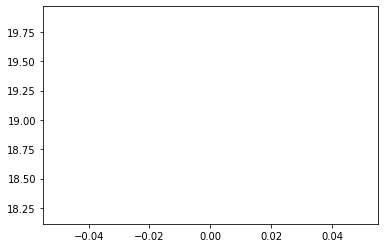

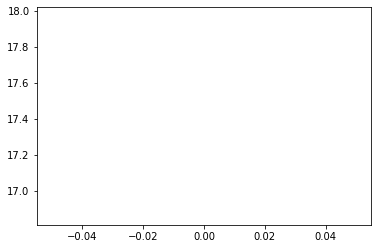

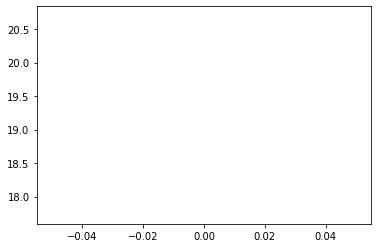

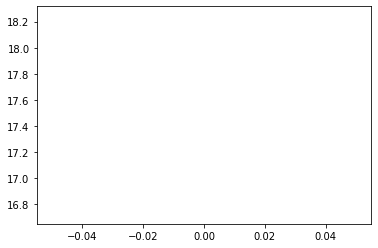

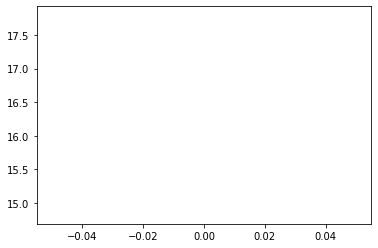

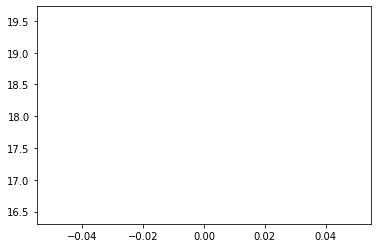

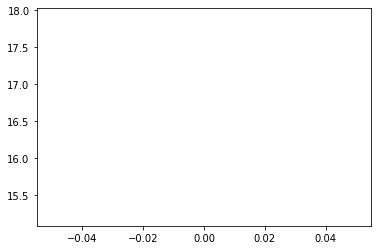

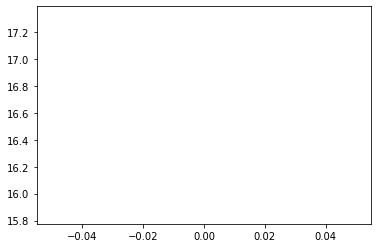

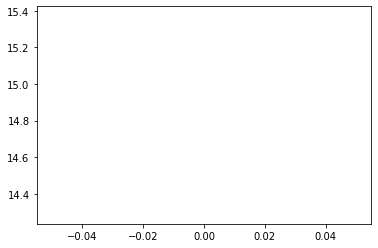

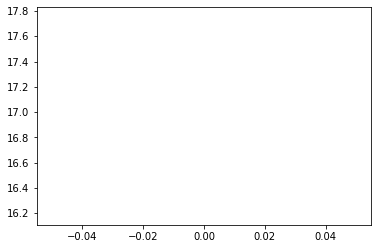

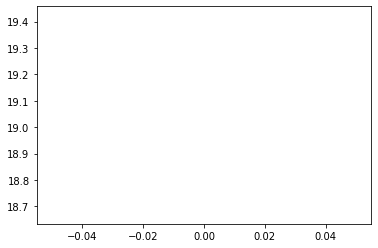

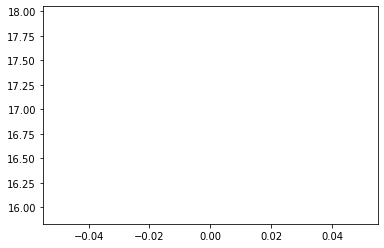

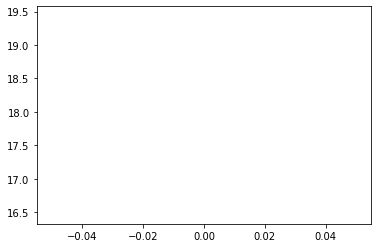

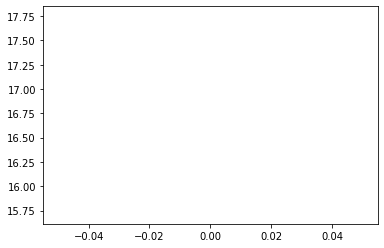

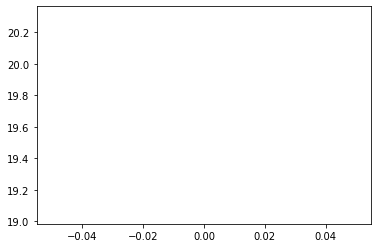

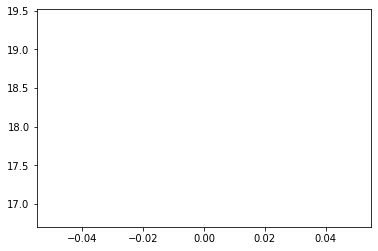

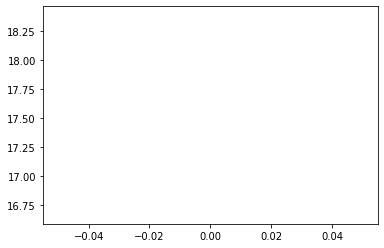

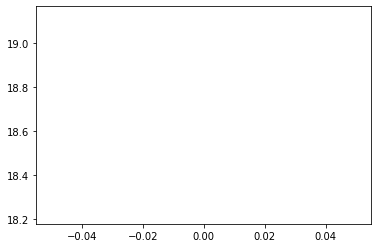

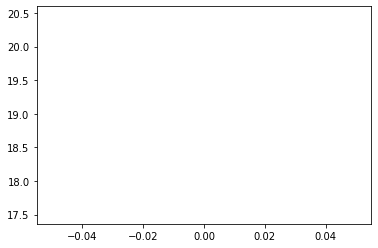

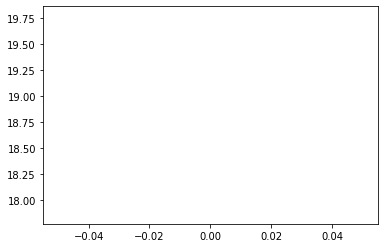

In [18]:
#train
#отрисовать факт синим
for episod in episodes[:20]:
    #мы учили систему выдавать последовательности длиной в 1, на более длинных система работать не обязана, 
    #так что тестим на последовательностях той же длины
    plt.plot(Y_train[episod[0]:episod[1],:])
    Y_pred = model.predict(X_train[episod[0]:episod[1],:],return_hist=True)
    [pred,p_array,m_pred] = Y_pred
    for i in range(len(pred)):
        #отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
        if 10+np.log(p_array[i])>0:
            plt.plot(pred[i],'--',linewidth=0.1*np.max([10+np.log(p_array[i]),0] ) )
    plt.show()

mae 1.556000733510583 mae_mean 0.0832805785193492


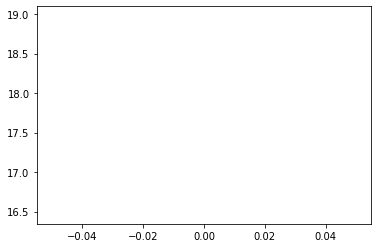

mae 1.1216950961795114 mae_mean 0.057280390869835704


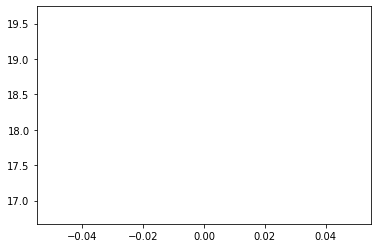

mae 0.43741888938363793 mae_mean 0.027581155345934527


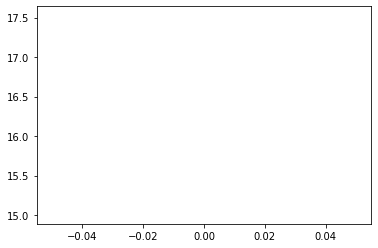

mae 0.09310680984972564 mae_mean 0.004974375552608185


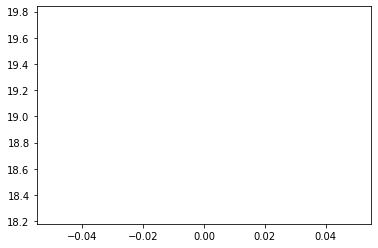

mae 0.1489302686677405 mae_mean 0.007806699328723555


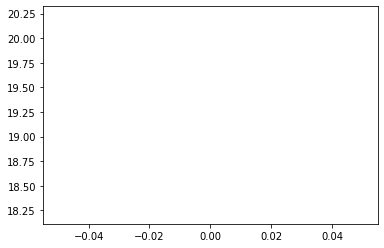

mae 0.22999142964127017 mae_mean 0.013427584156116484


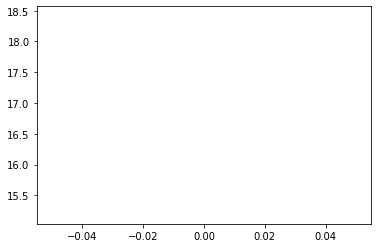

mae 1.0192409879276347 mae_mean 0.060409519813361574


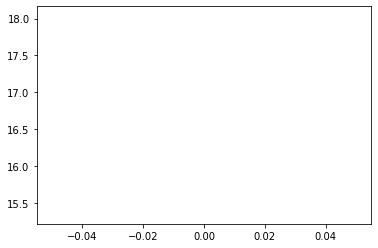

mae 0.577593269011107 mae_mean 0.03029874197058495


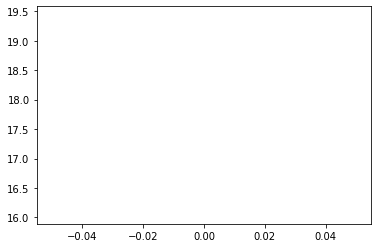

mae 1.9573088584340699 mae_mean 0.16932149451852063


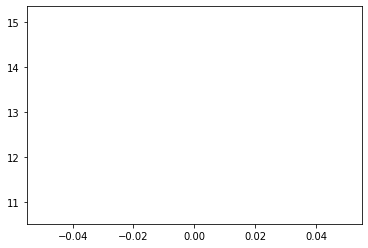

In [19]:
#test
#отрисовать факт
counter = 0
lst = []
for episod in episodes:
    counter += 1
    #мы учили систему выдавать последовательности длиной в 1, на более длинных система работать не обязана, 
    #так что тестим на последовательностях той же длины
    draw = counter<10
    if draw:
        plt.plot(Y_test[episod[0]:episod[1],:])
    Y_pred = model.predict(X_test[episod[0]:episod[1],:],return_hist=True)
    [pred,p_array,m_pred] = Y_pred
    if draw:
        for i in range(len(pred)):
            #отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
            if 10+np.log(p_array[i])>0:
                plt.plot(pred[i],'--',linewidth=0.1*np.max([10+np.log(p_array[i]),0] ) )
    mae = np.mean(np.abs(m_pred - Y_test[episod[0]:episod[1],:]))
    mae_mean = mae/np.mean(np.abs(Y_test[episod[0]:episod[1],:]))
    lst.append({'mae':mae, 'mae_mean':mae_mean})
    if draw:
        print('mae',mae,'mae_mean',mae_mean)
        plt.show()

In [20]:
report = pd.DataFrame(lst)
report

mae  mae_mean
0    1.556001  0.083281
1    1.121695  0.057280
2    0.437419  0.027581
3    0.093107  0.004974
4    0.148930  0.007807
..        ...       ...
494  1.234499  0.082945
495  0.163651  0.009743
496  0.317017  0.021831
497  0.204777  0.012344
498  0.685496  0.034856

[499 rows x 2 columns]

In [21]:
print(report.mae.mean(),report.mae_mean.mean())

0.7437004786074705 0.046819298679052004
